In [25]:
import time
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import pylab

from scipy.stats import poisson
from sklearn.neighbors import LocalOutlierFactor

In [26]:
#read csv file 
X_train_csv = pd.read_csv("../MLinTheUnknown-Data/X_train.csv", header = None)

# data = pd.read_csv("./real_estate.csv",header =None)
y_train_label_csv = pd.read_csv("../MLinTheUnknown-Data/y_train.csv",header = None)


X_val_csv = pd.read_csv("../MLinTheUnknown-Data/X_val.csv", header = None)
y_val_label_csv =pd.read_csv("../MLinTheUnknown-Data/y_val.csv", header = None)



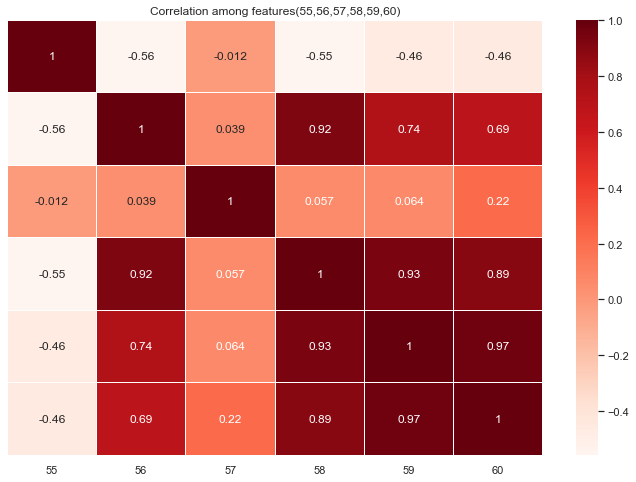

In [54]:
data_cut = X_train_csv[[55,56,57,58,59,60]]
corr_01  = np.corrcoef(data_cut,rowvar=0)

f,ax = plt.subplots(figsize = (12, 8))

sns.heatmap(corr_01, xticklabels=data_cut.columns, yticklabels=False, annot = True, cmap='Reds', linewidths = 0.05, ax =ax)

plt.title(f'Correlation among features(55,56,57,58,59,60)')
plt.show()


In [3]:
dataset_describe = X_train_csv.describe()
head = dataset_describe[[0,1,2,3,4,5]]
head.to_csv('data_describe.png', header=None,index=False)

In [4]:
head

,0,1,2,3,4,5
count,8346.000000,8346.000000,8346.000000,8346.000000,8346.000000,8346.000000
mean,49902.609741,6.686965,12.823958,18.563598,26.485375,-9.074637
std,68758.941403,16.299765,17.434447,24.649256,36.984625,12.544882
min,-16757.598600,0.088287,0.000100,0.000100,0.000100,-127.407470
25%,6703.926650,2.282439,1.617982,2.362283,4.937769,-11.558429
50%,19188.954000,3.804842,4.936646,7.239355,11.638708,-3.350116
75%,62472.877800,8.438259,17.145460,26.085503,34.549582,-1.121579
max,668677.085900,1339.879283,164.257913,221.558494,664.208067,-0.021669


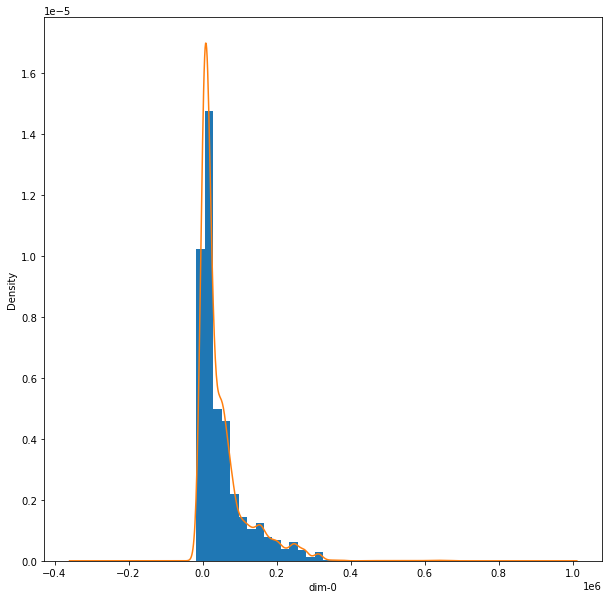

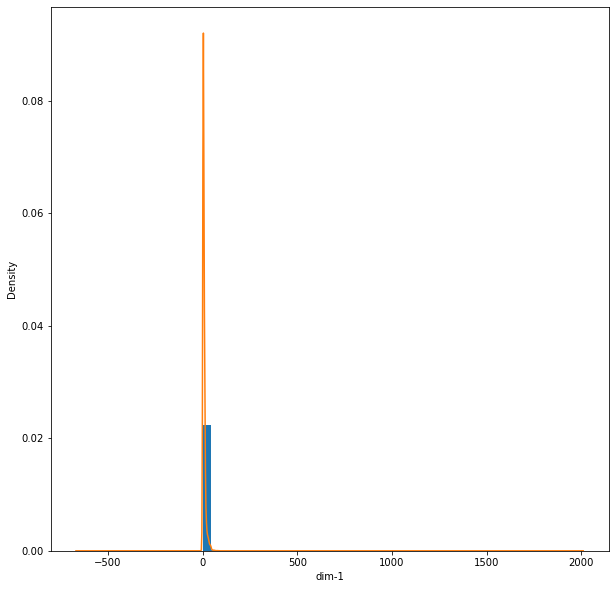

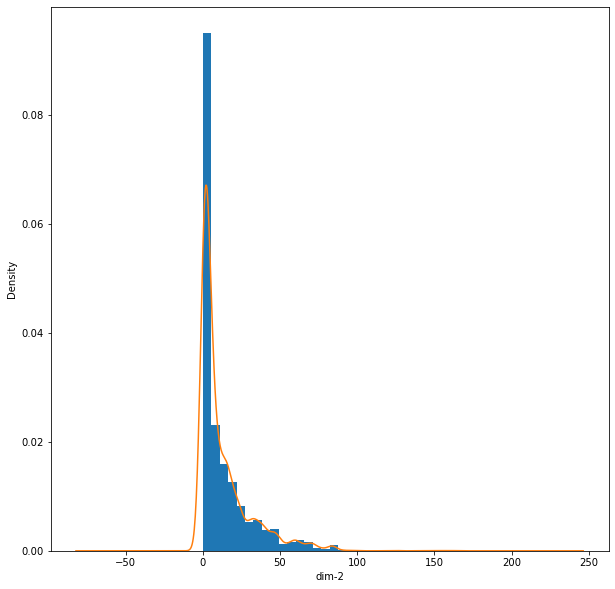

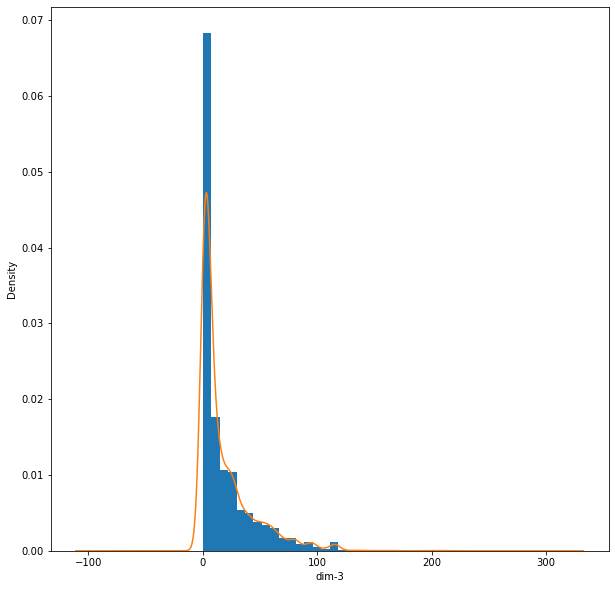

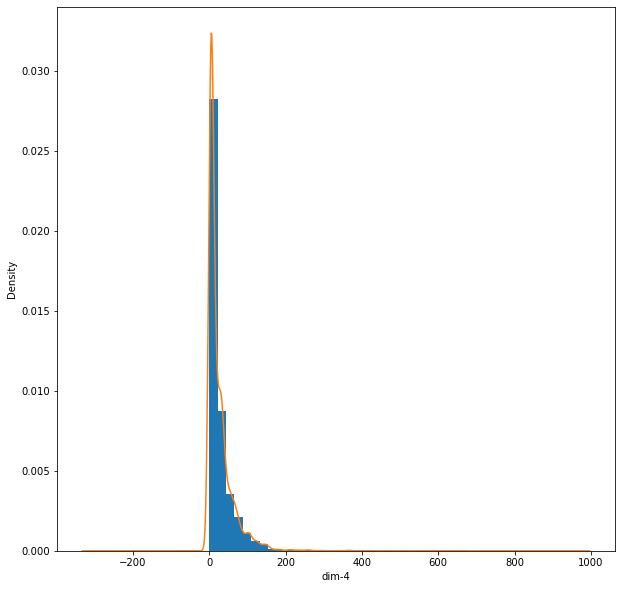

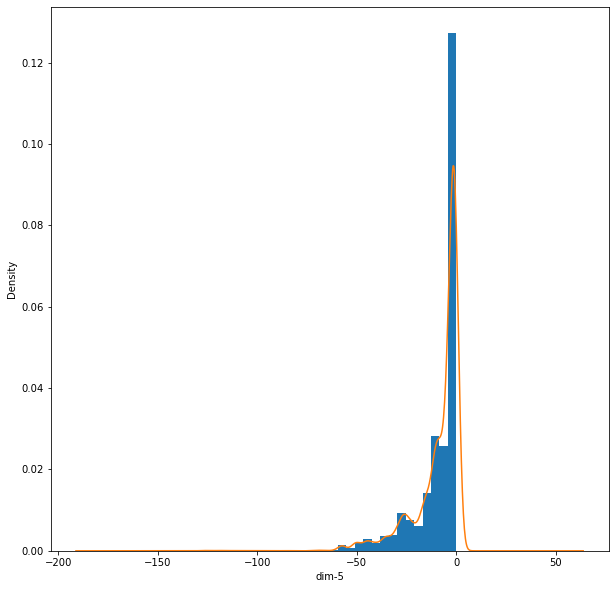

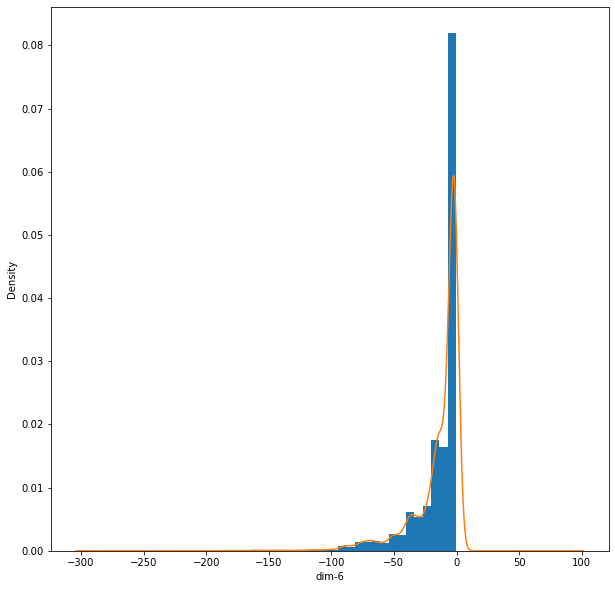

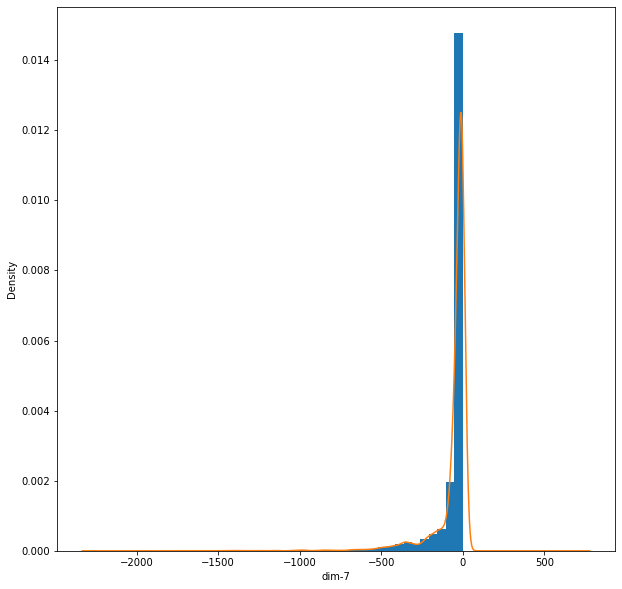

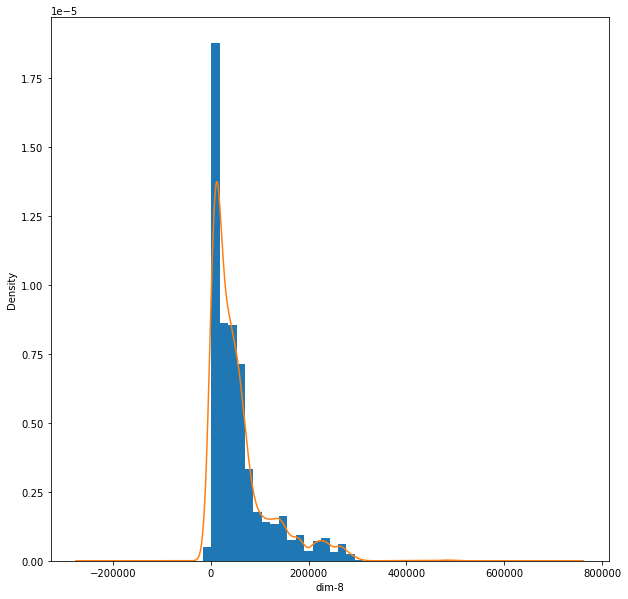

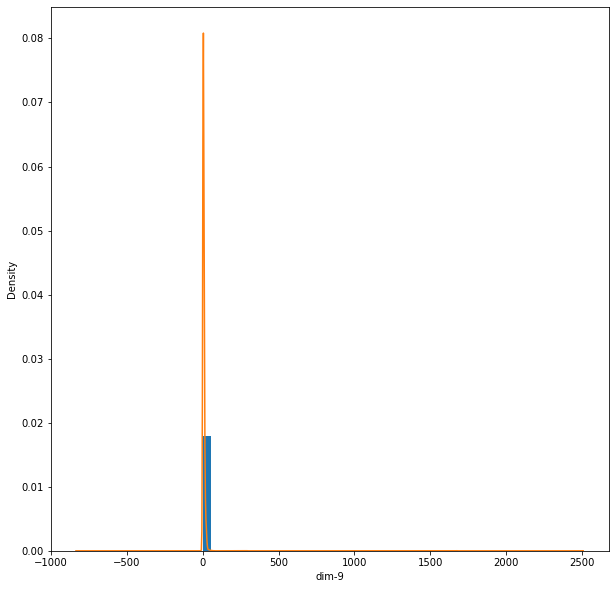

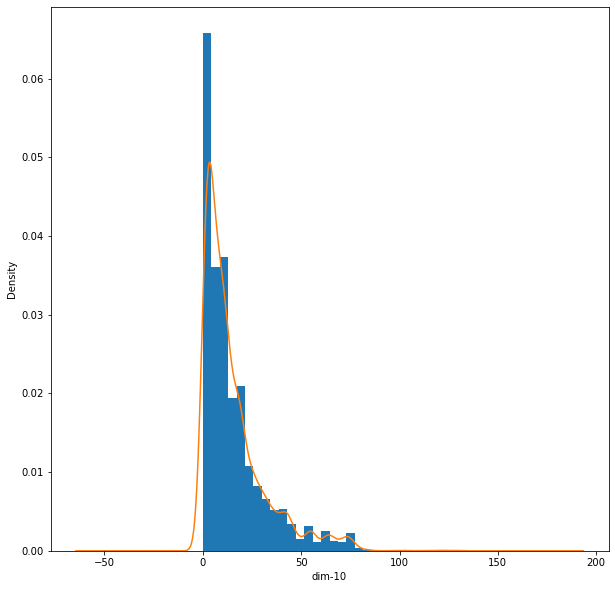

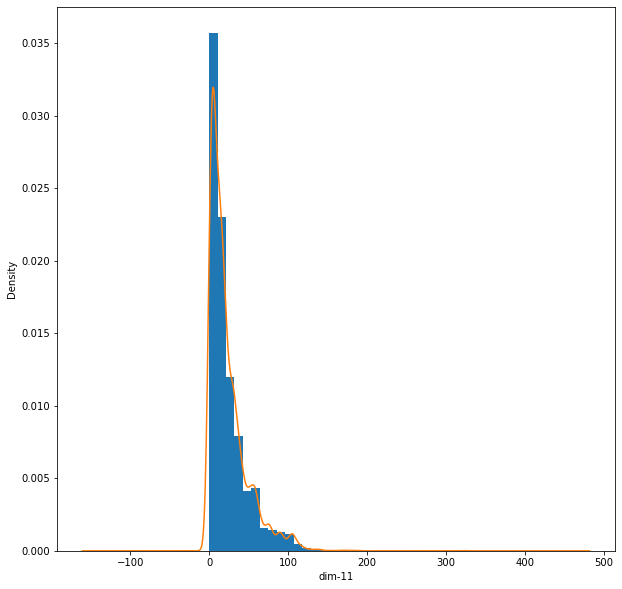

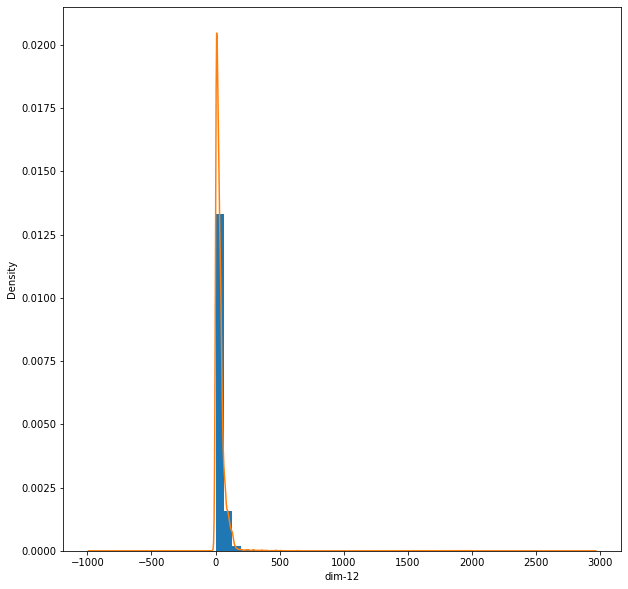

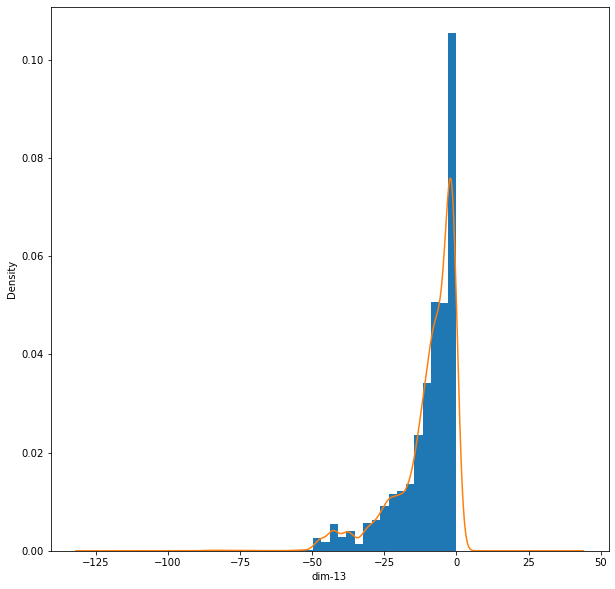

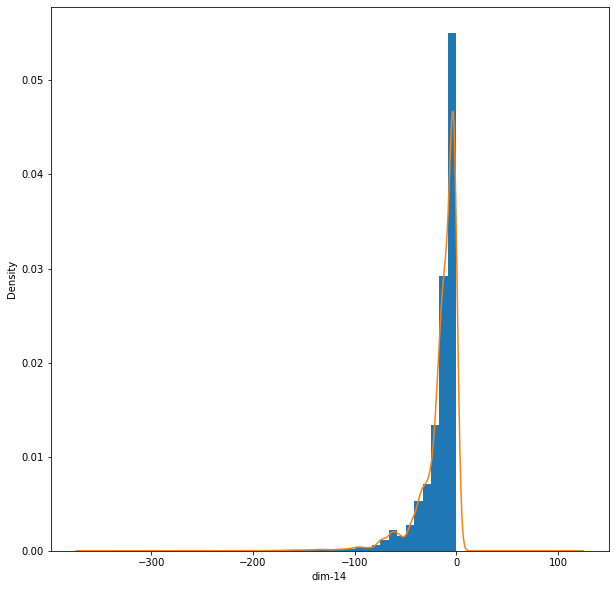

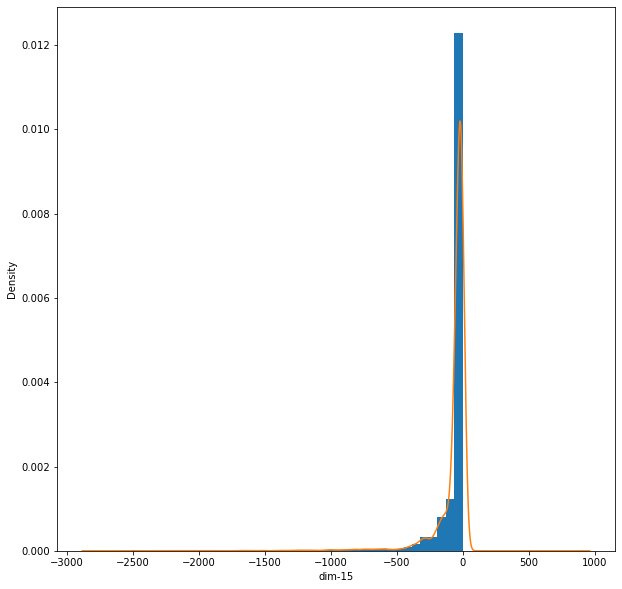

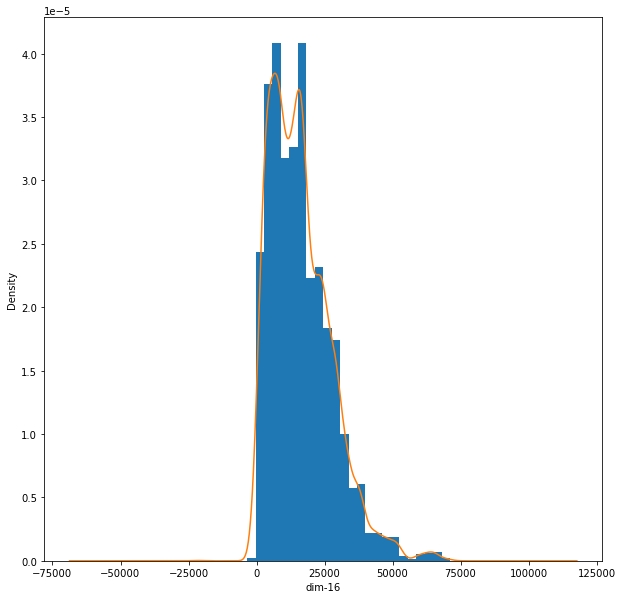

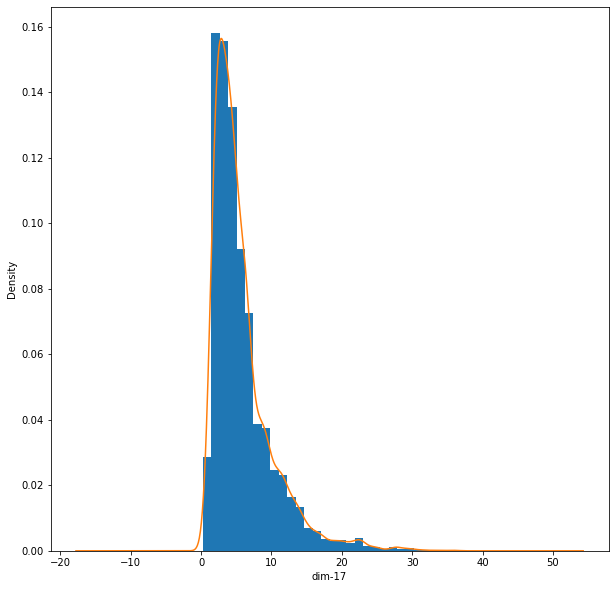

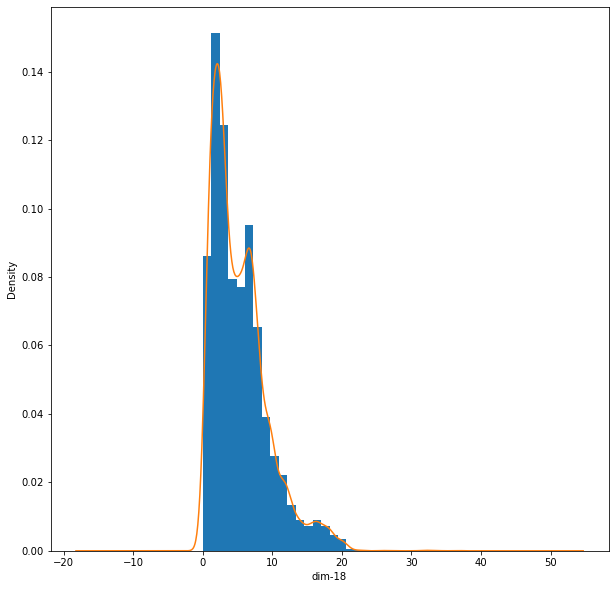

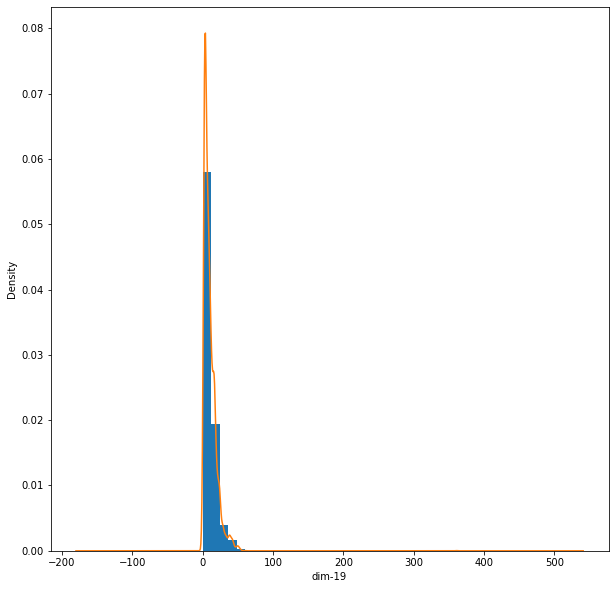

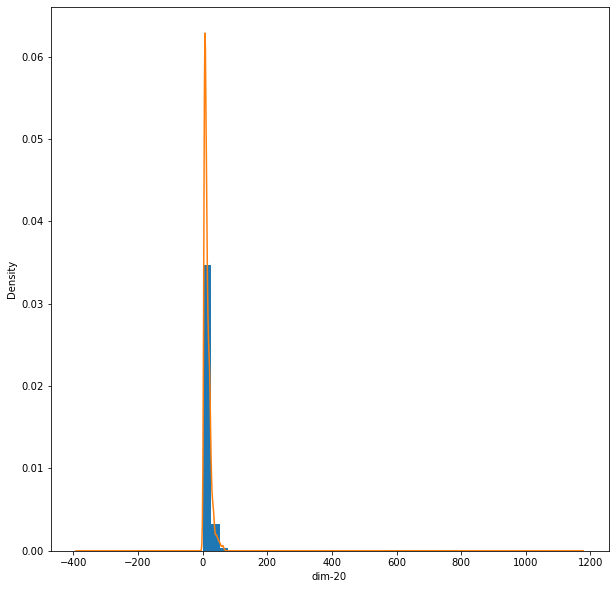

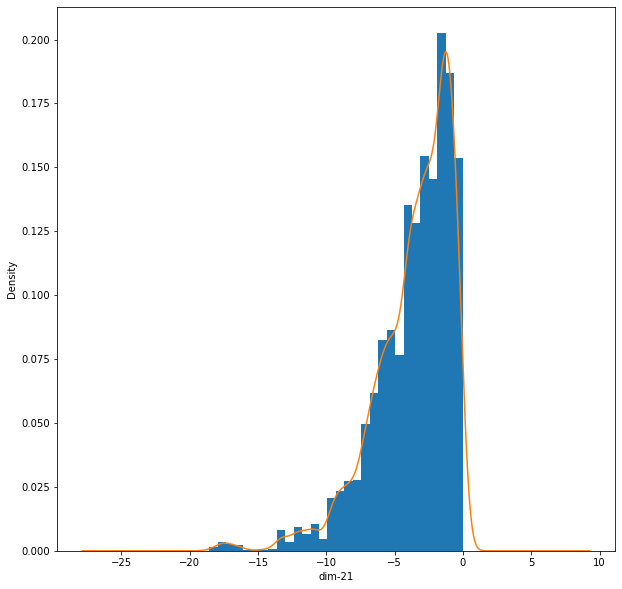

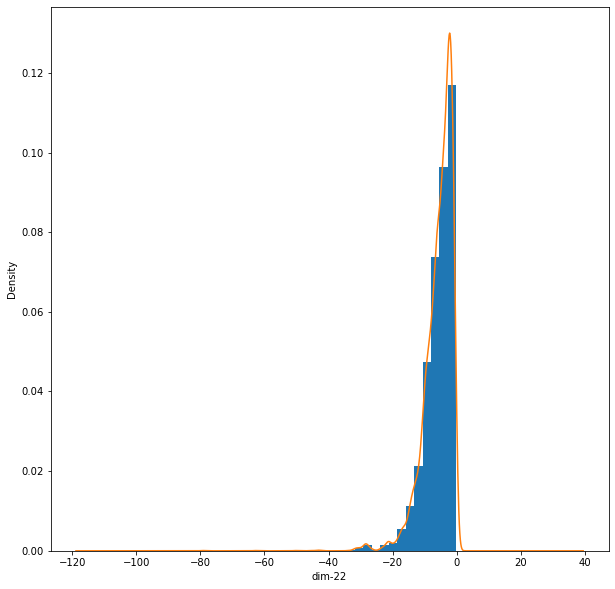

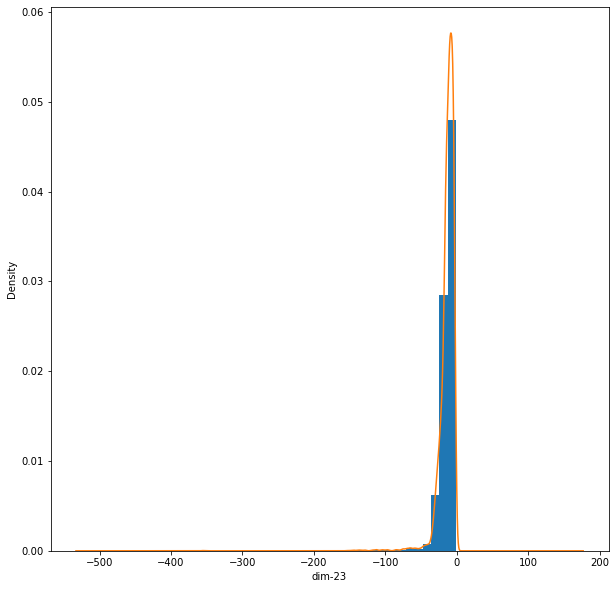

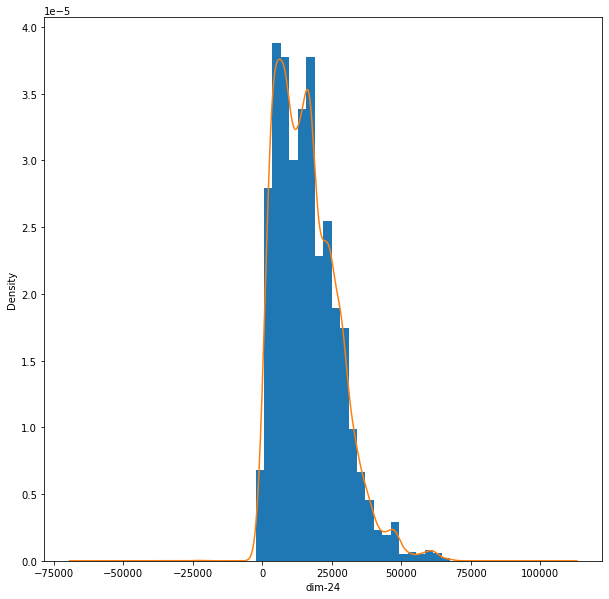

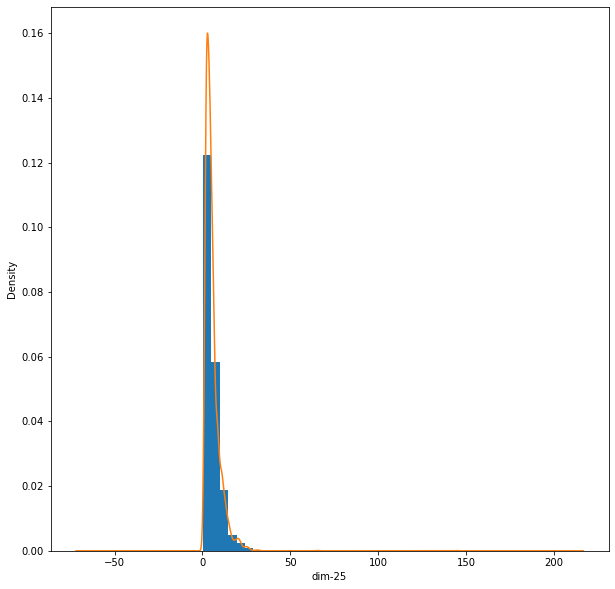

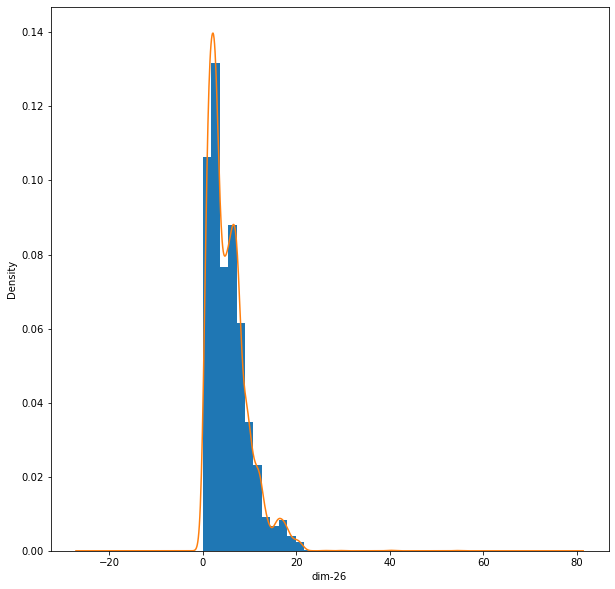

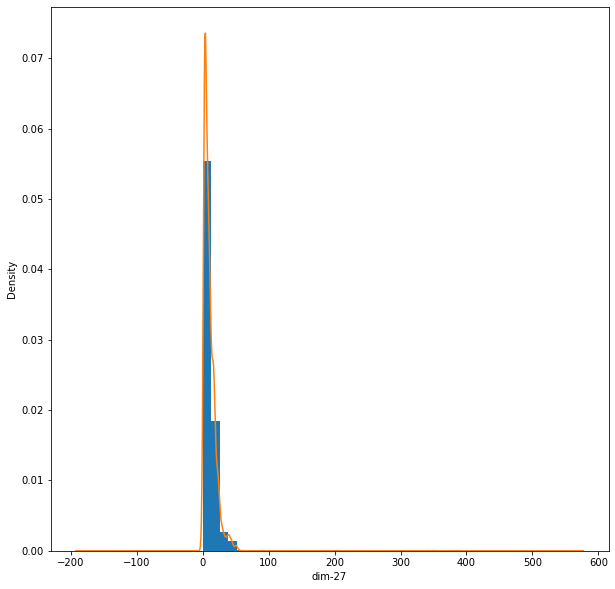

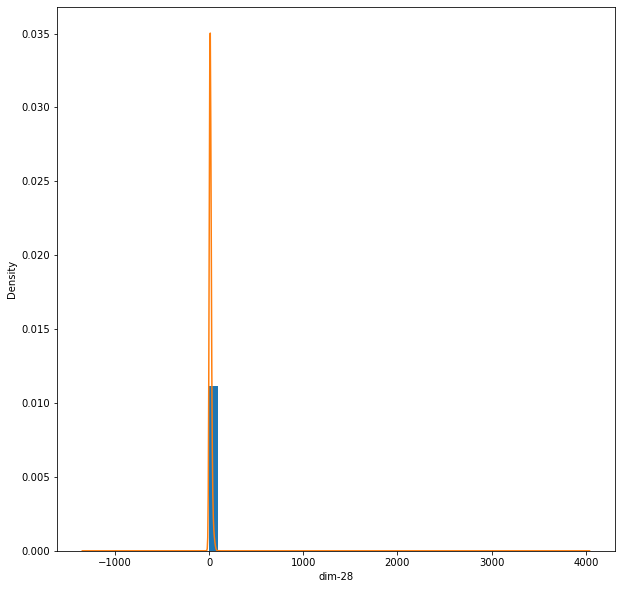

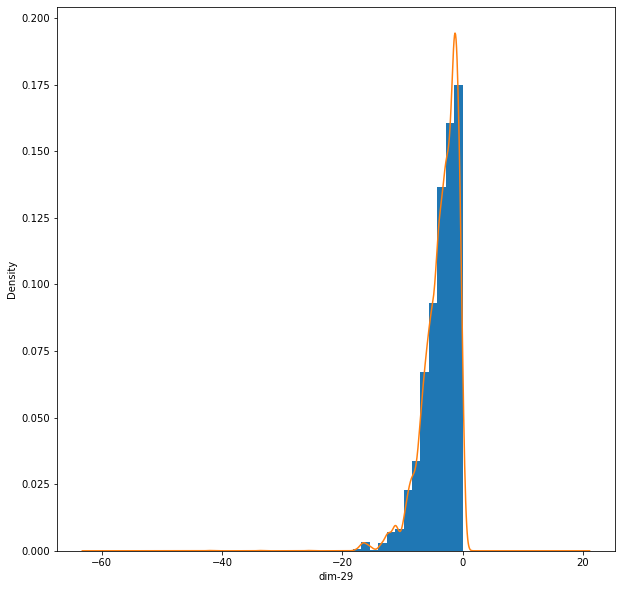

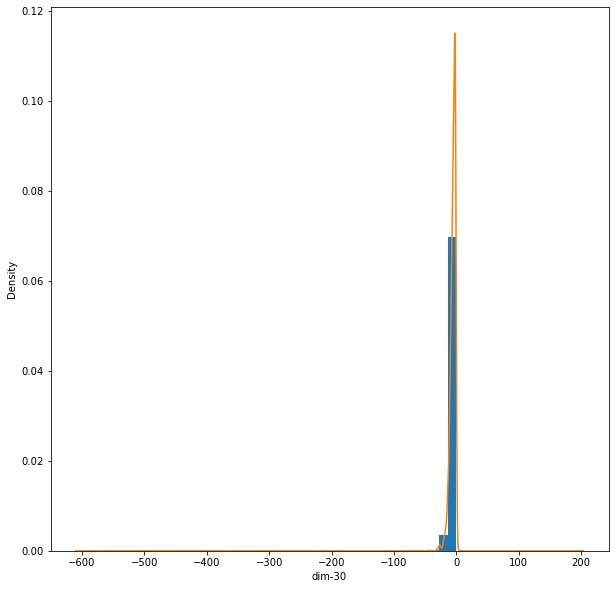

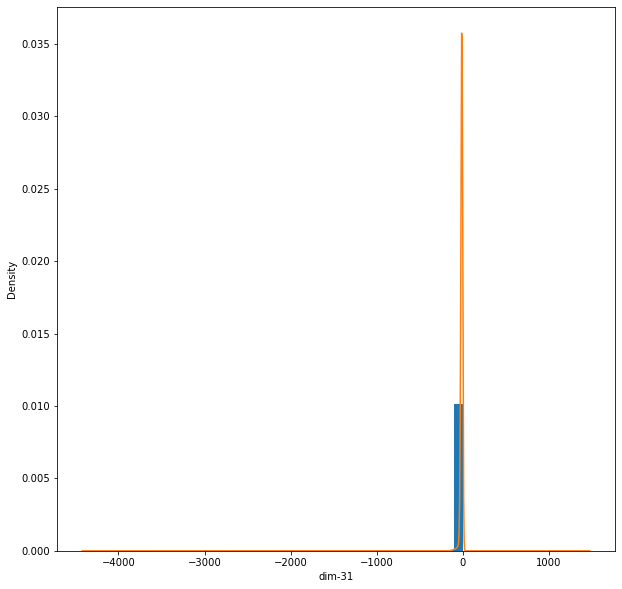

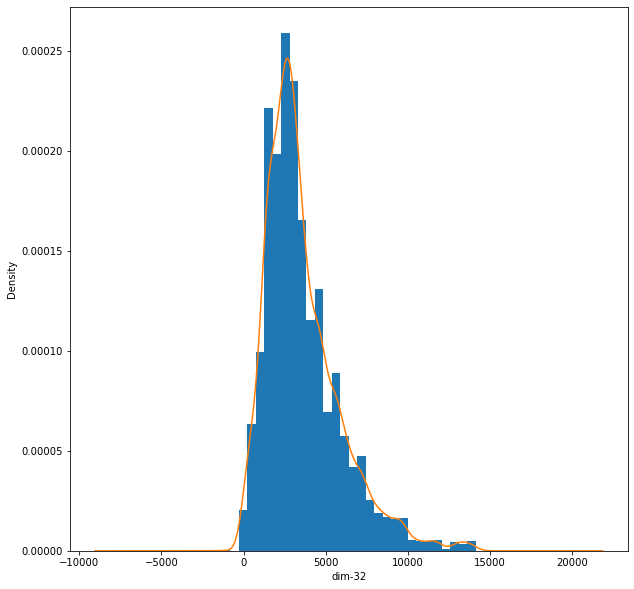

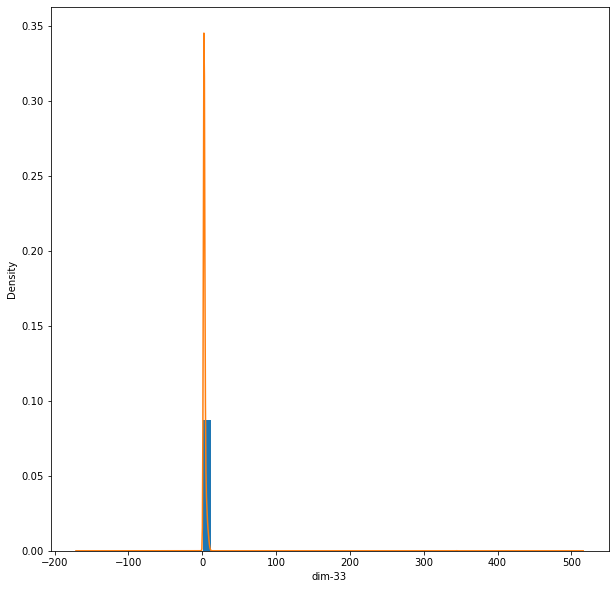

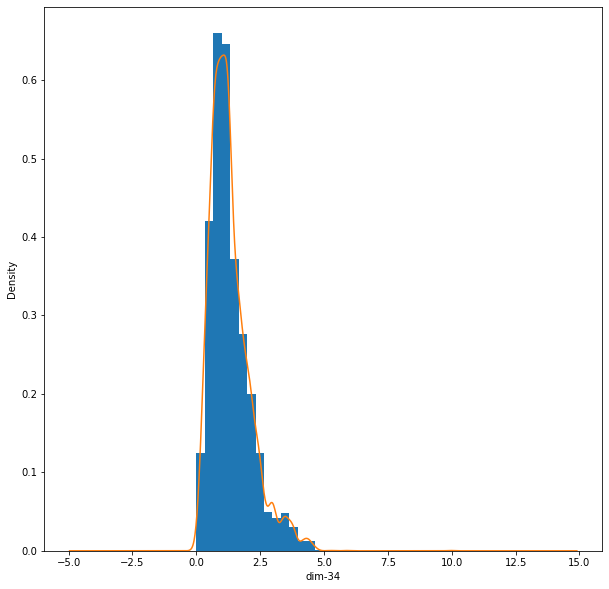

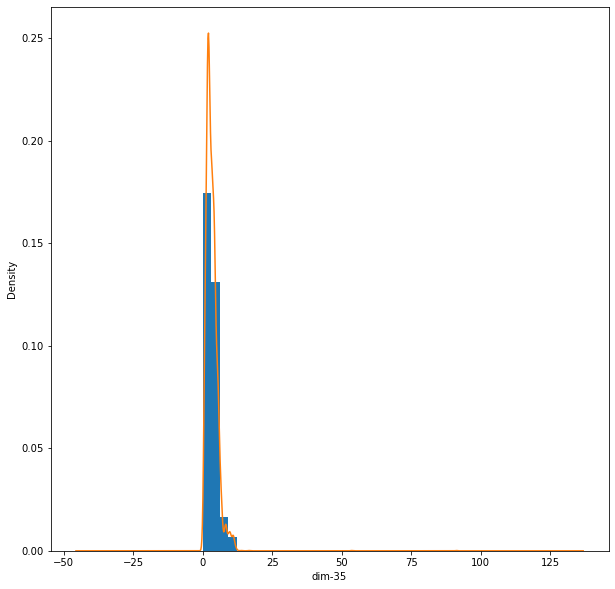

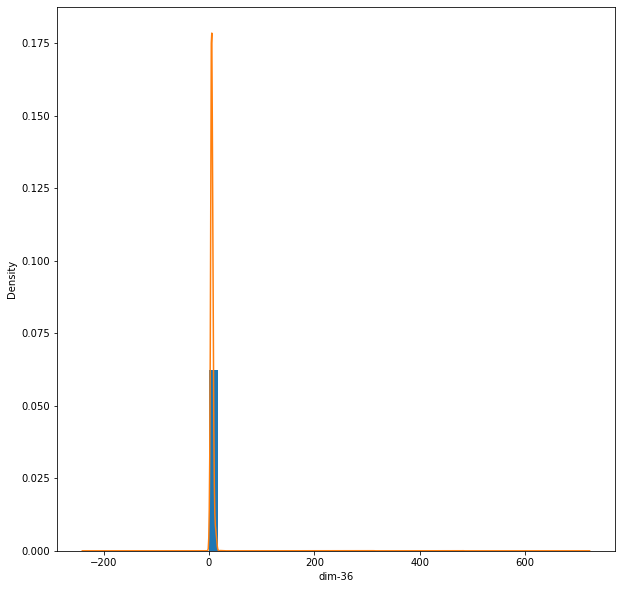

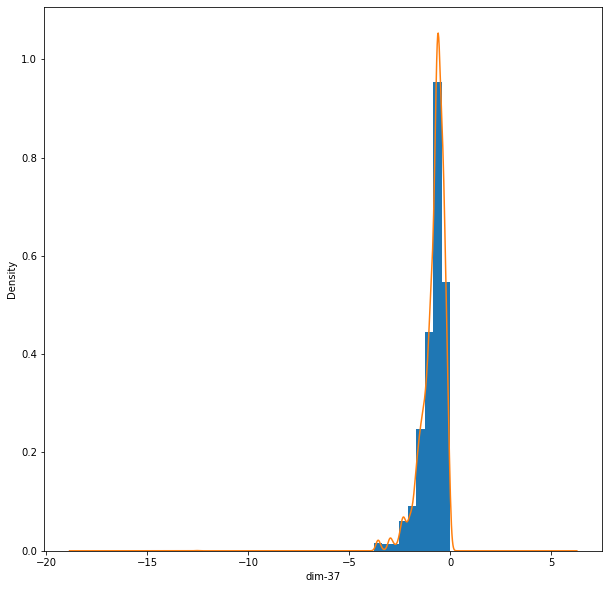

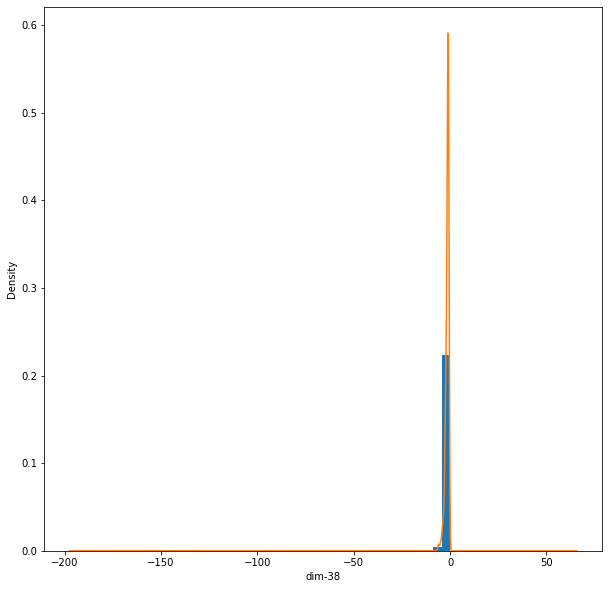

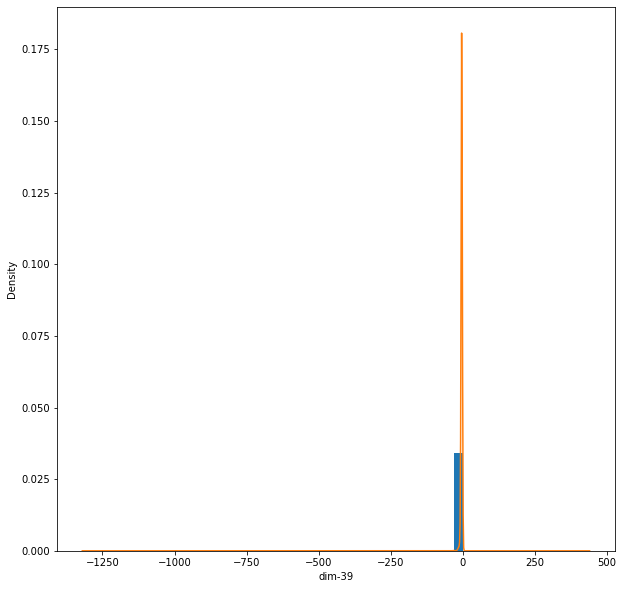

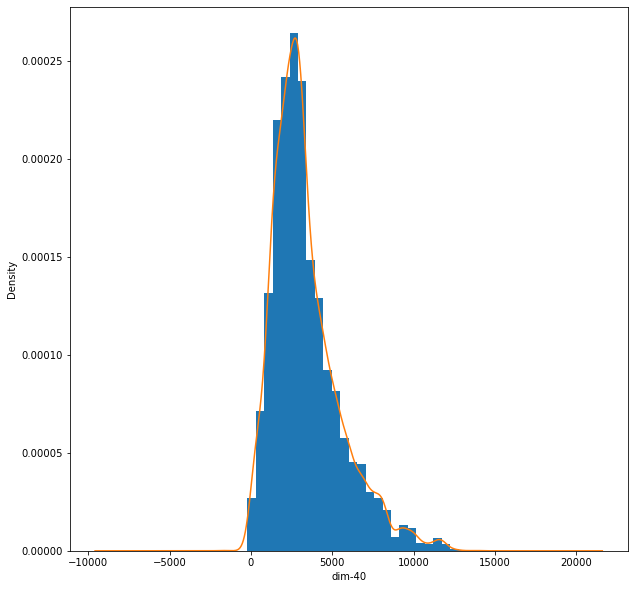

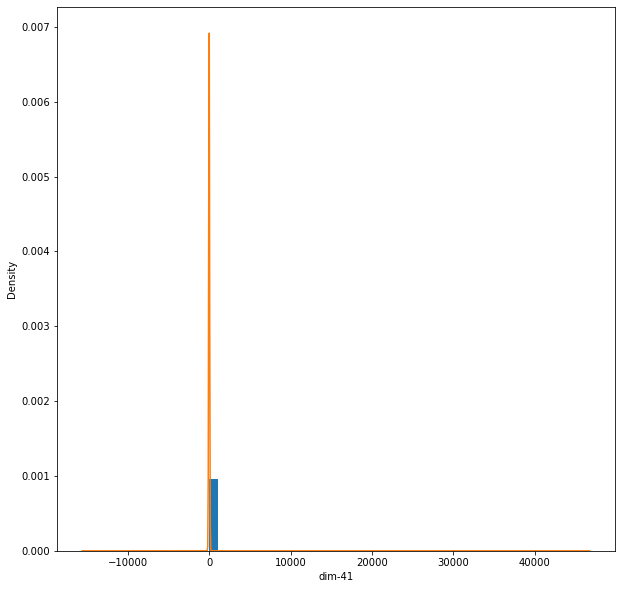

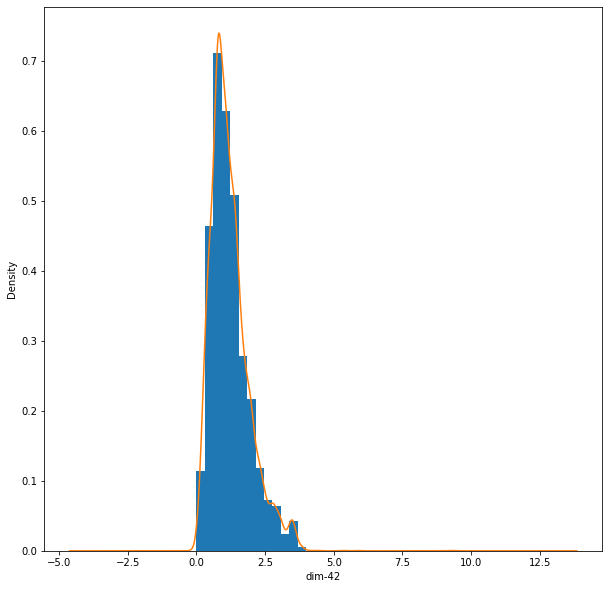

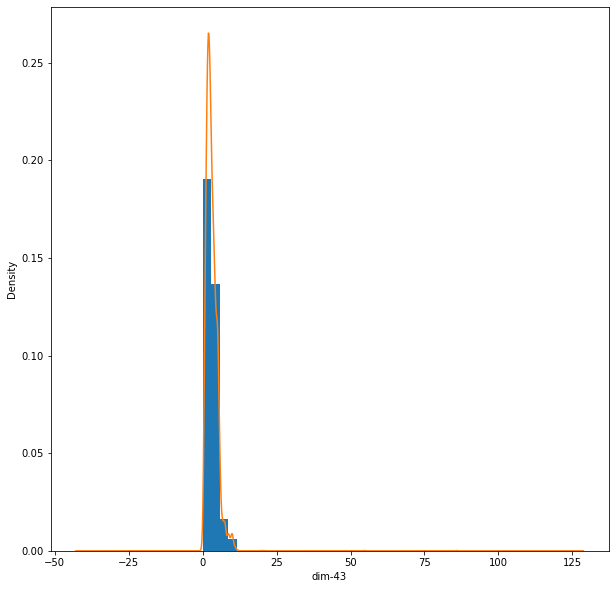

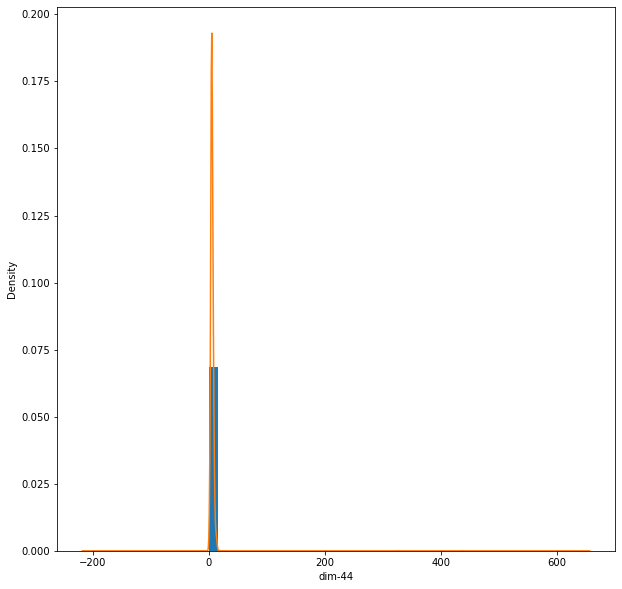

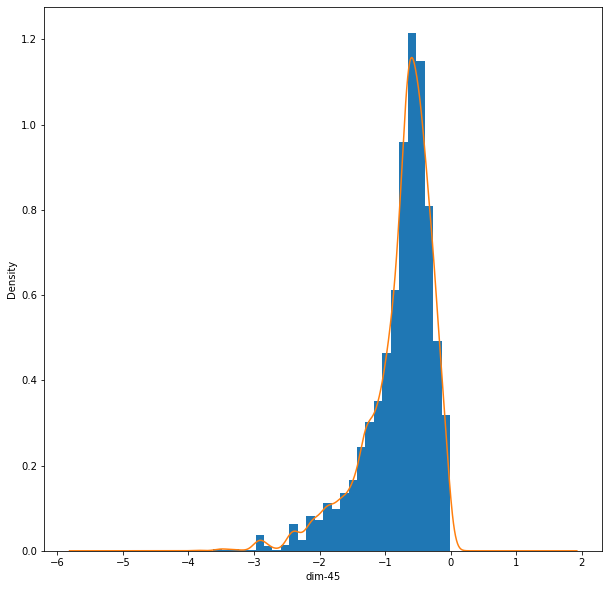

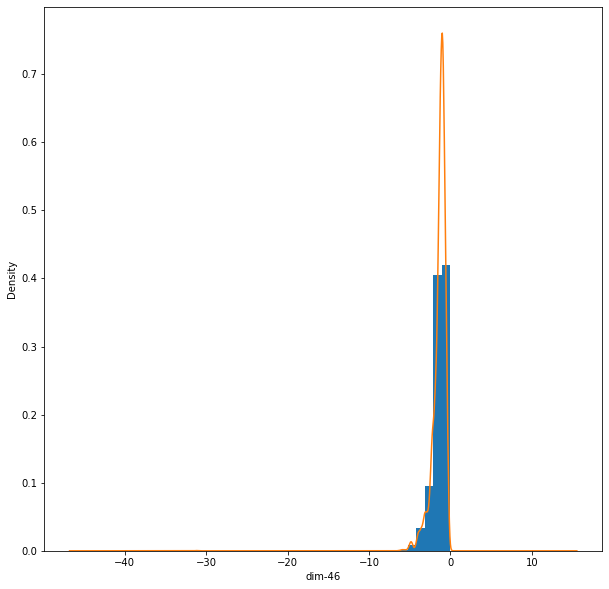

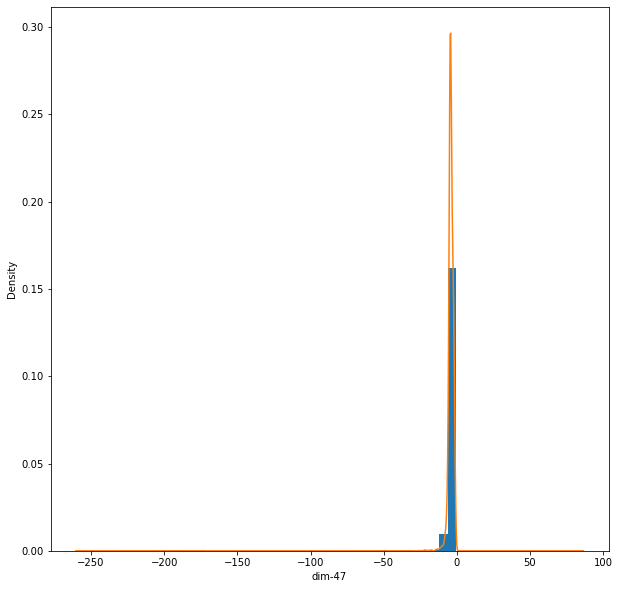

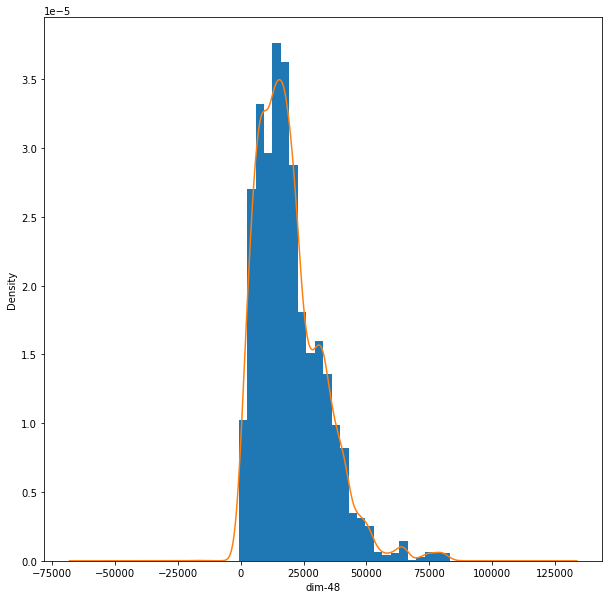

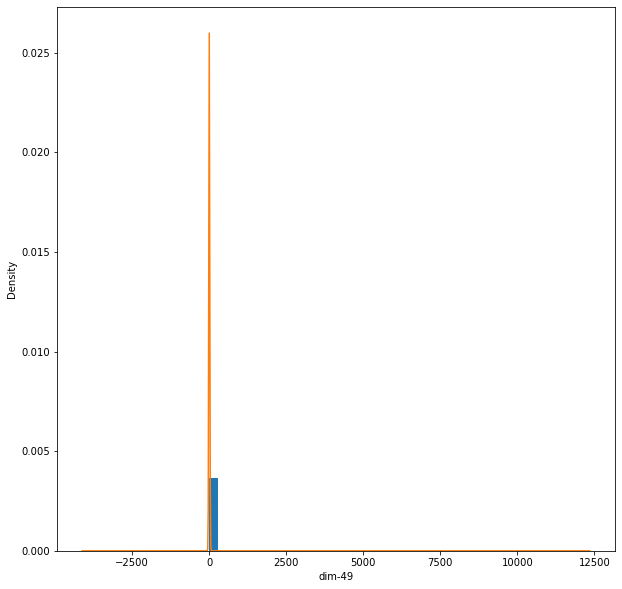

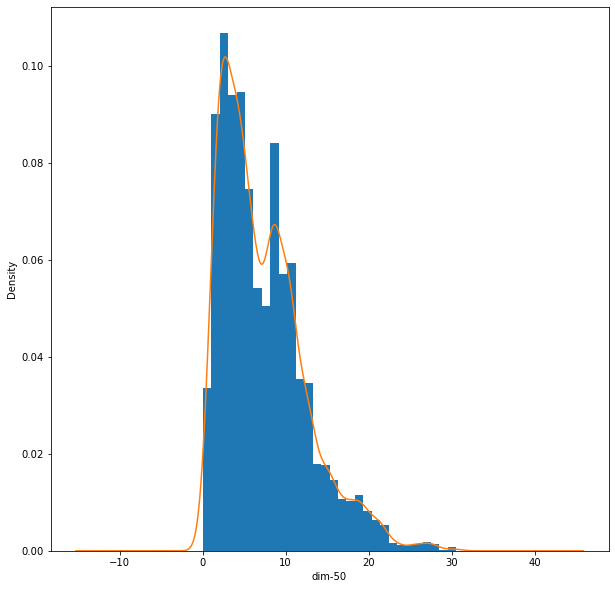

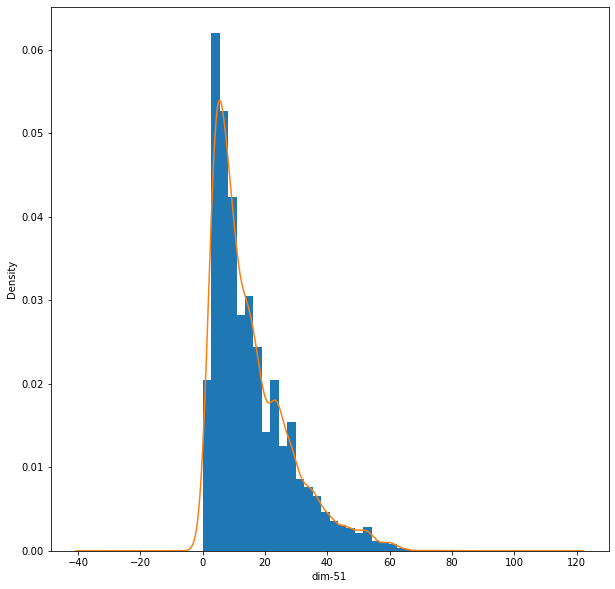

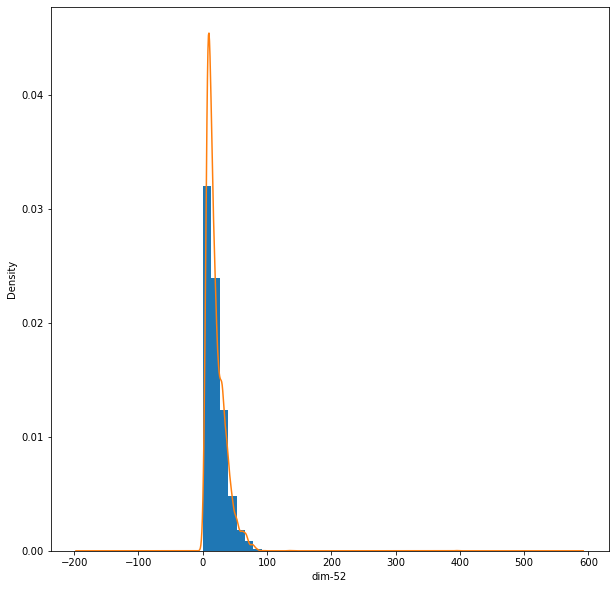

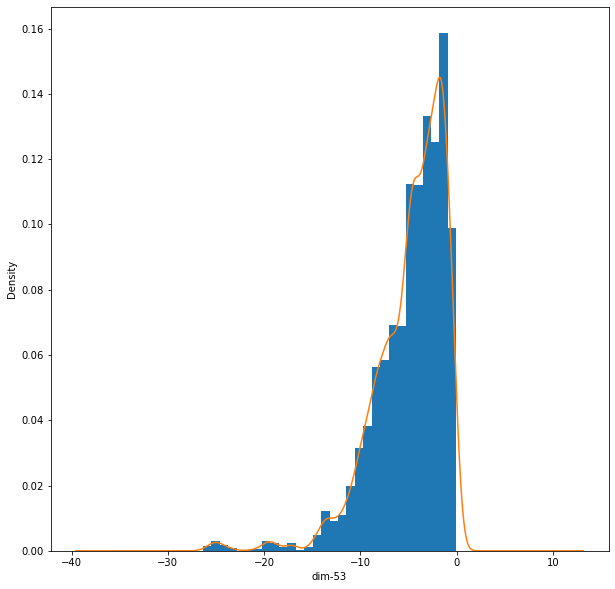

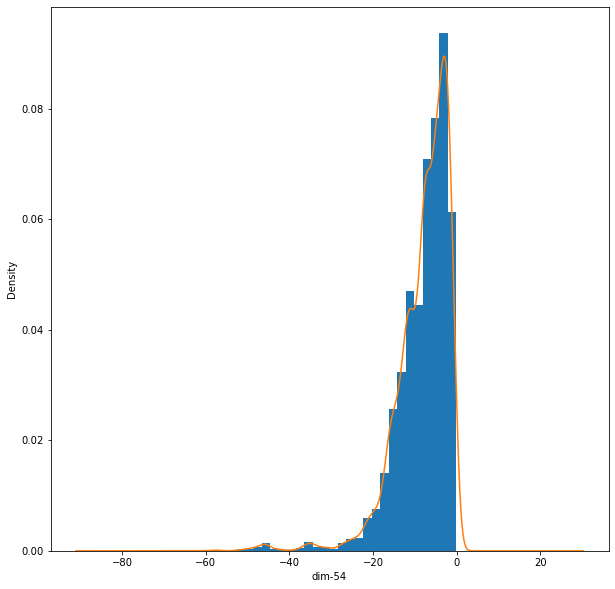

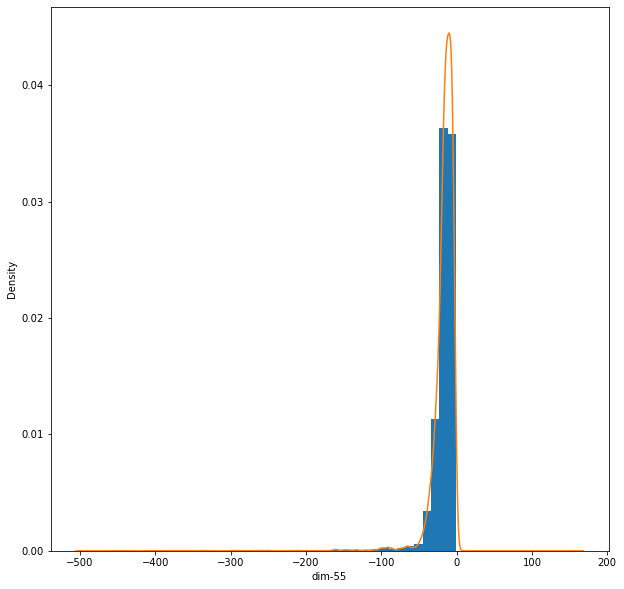

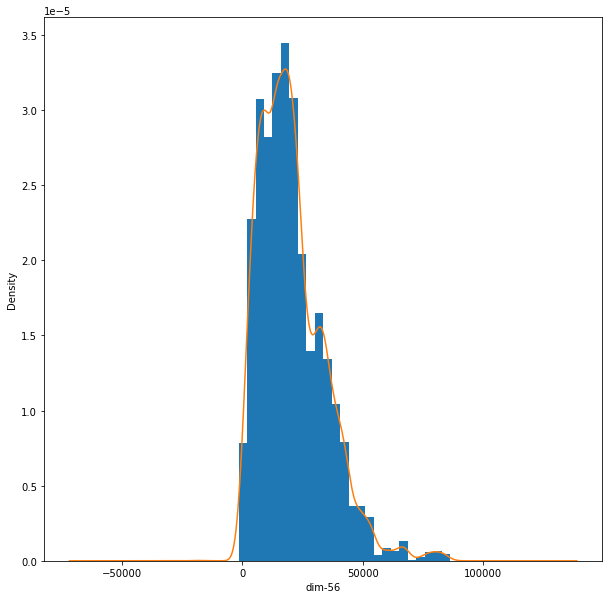

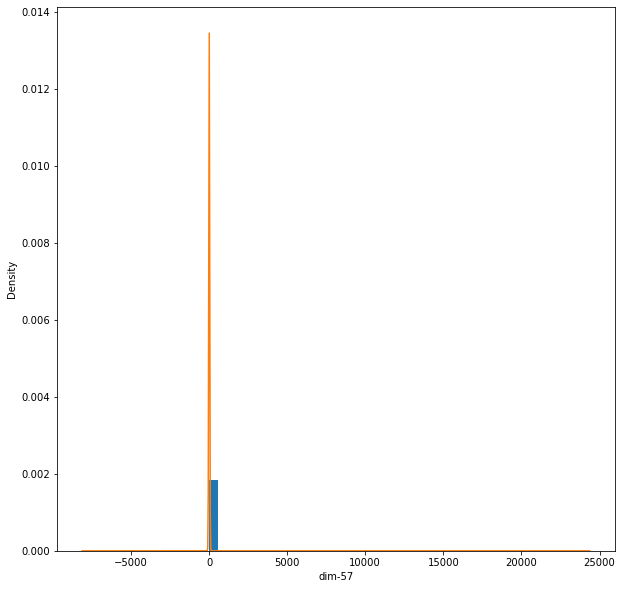

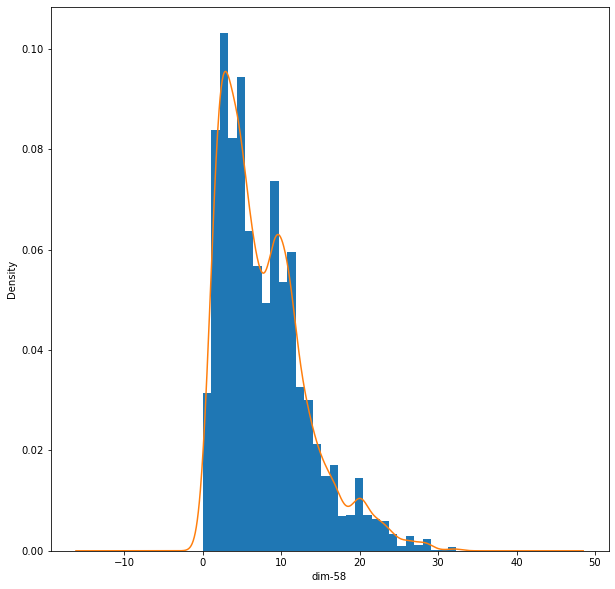

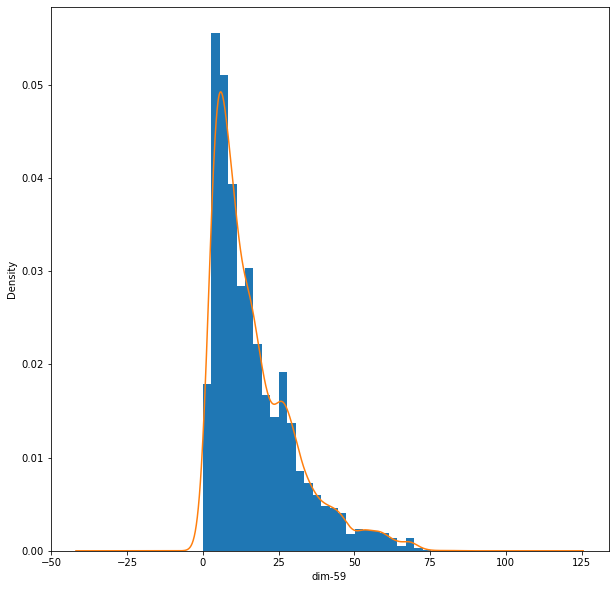

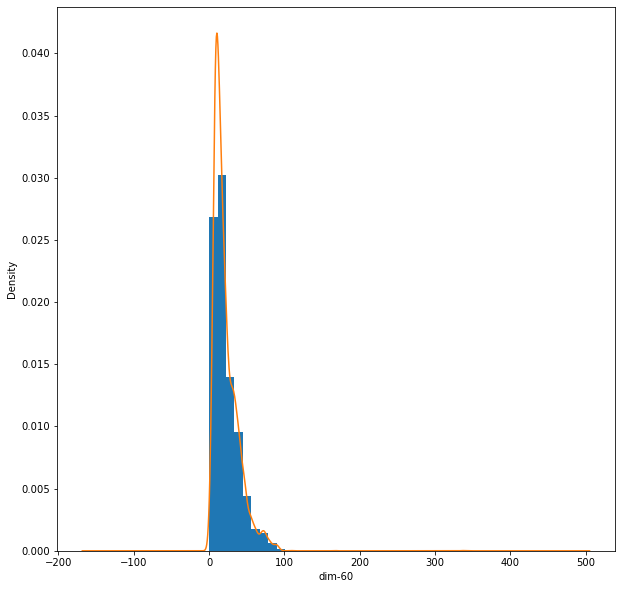

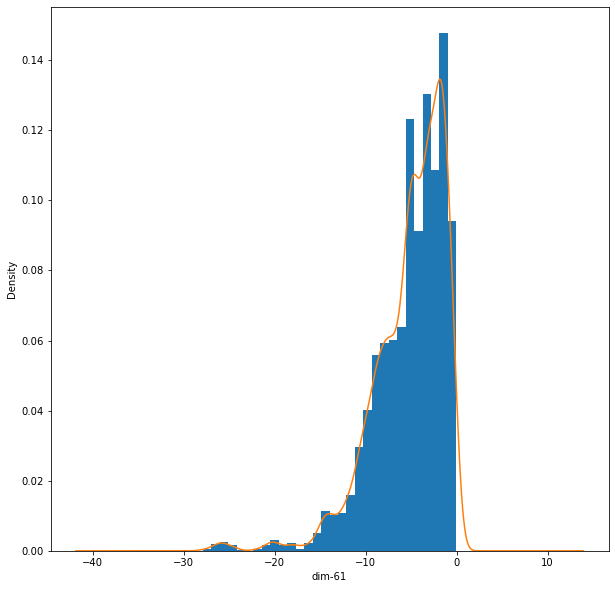

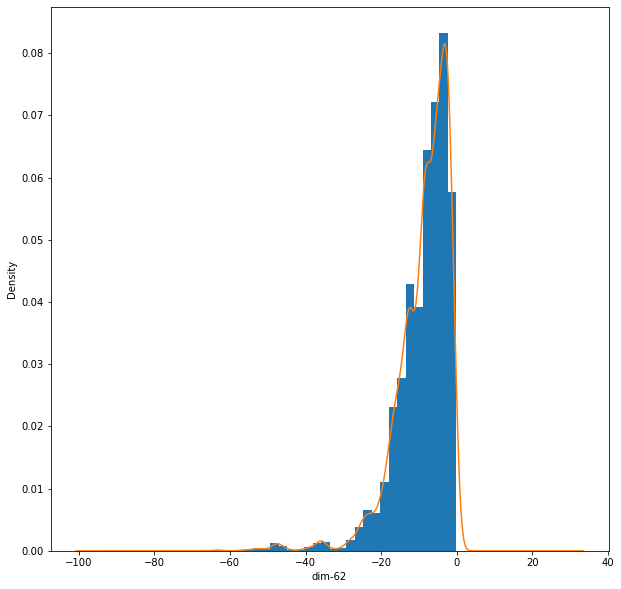

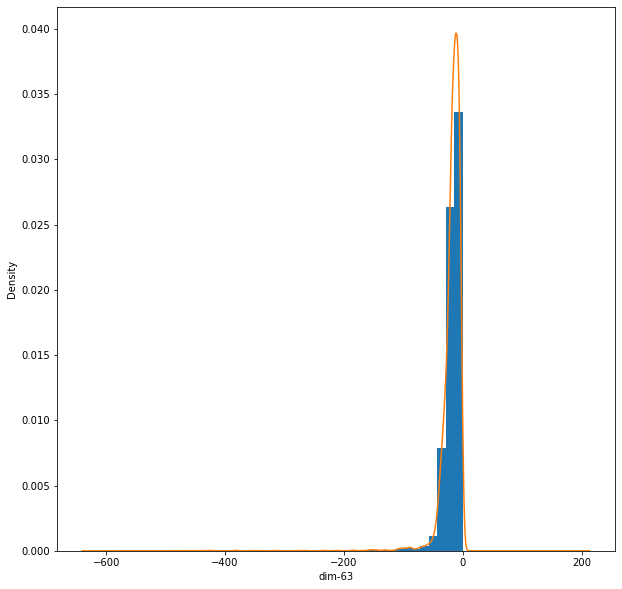

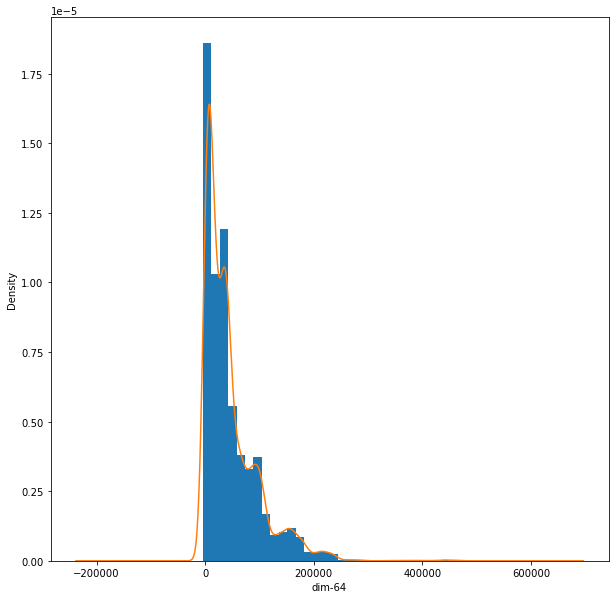

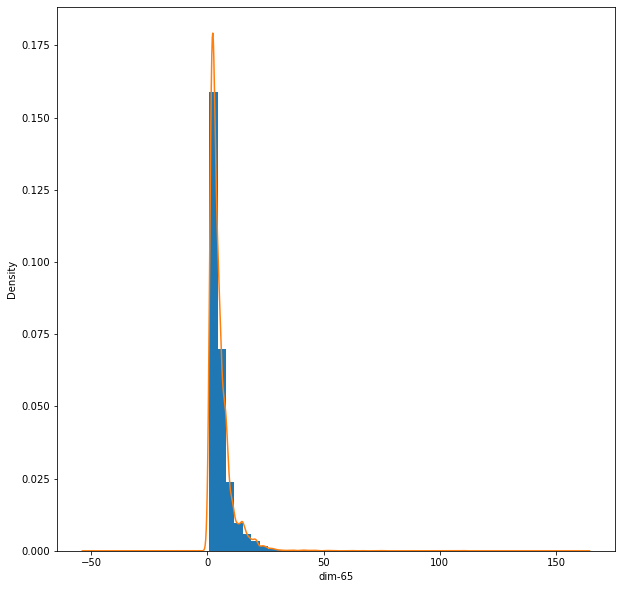

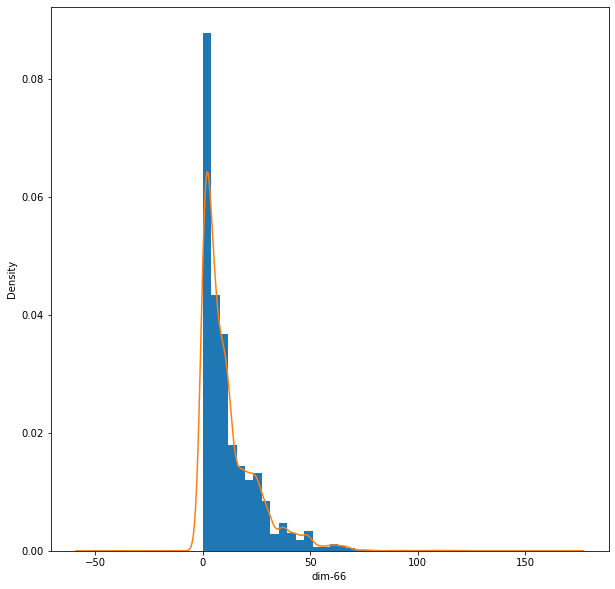

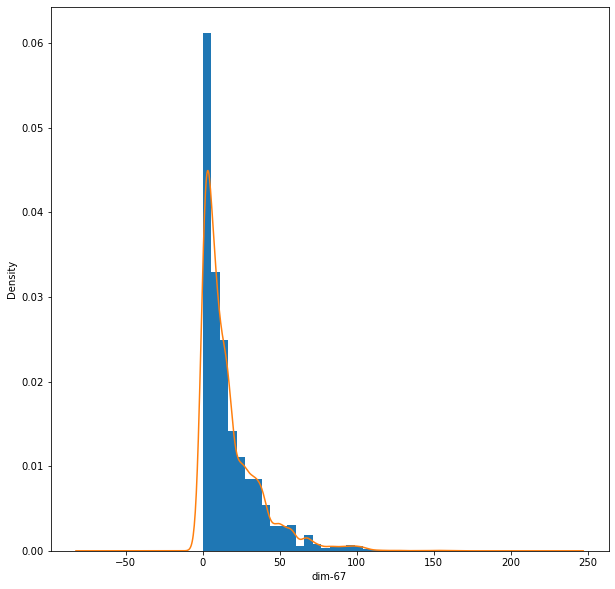

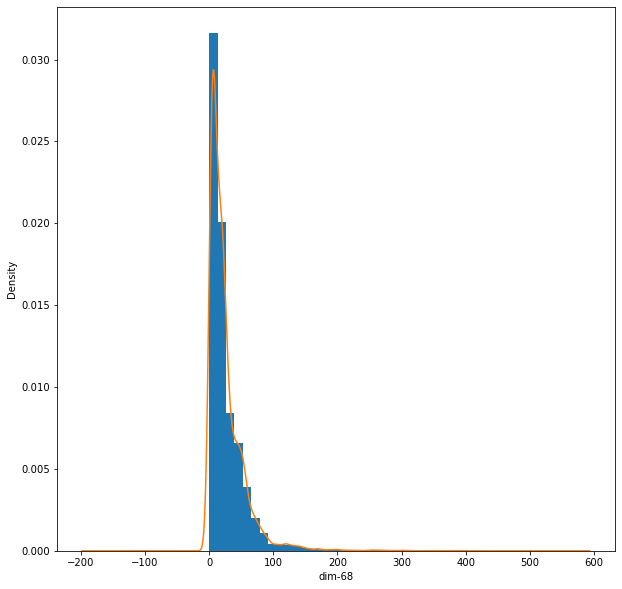

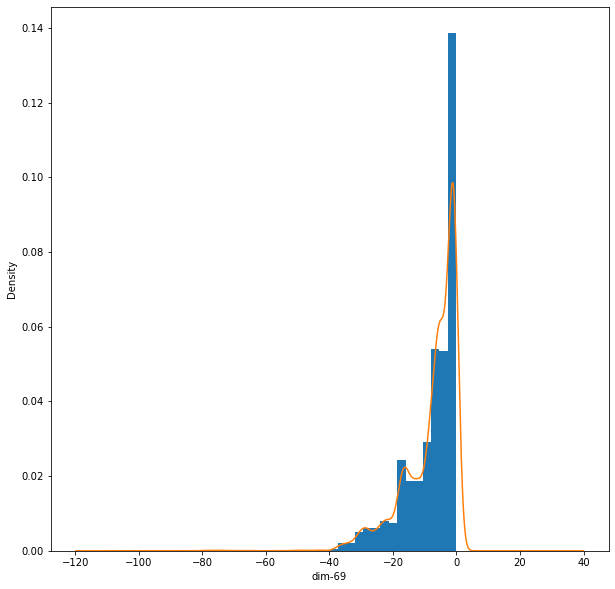

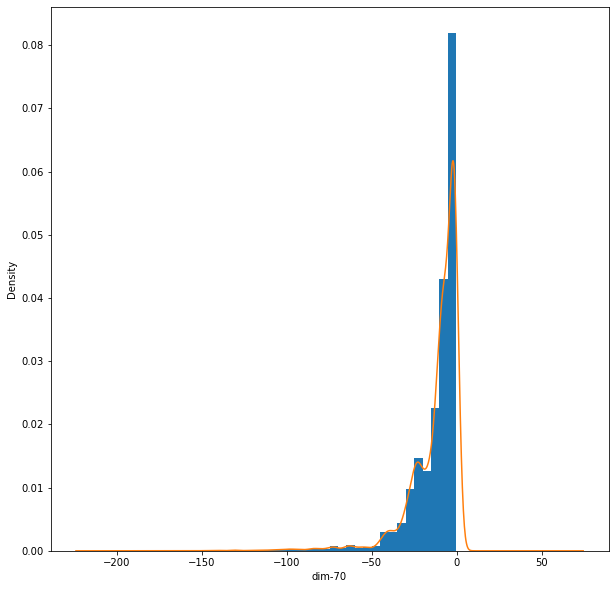

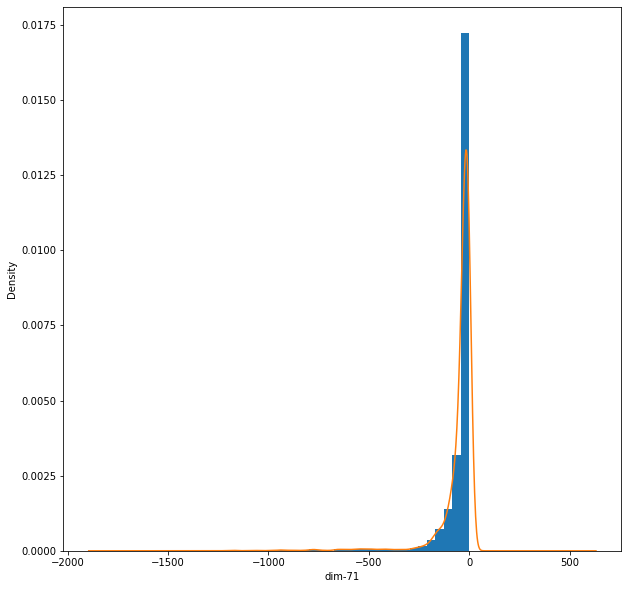

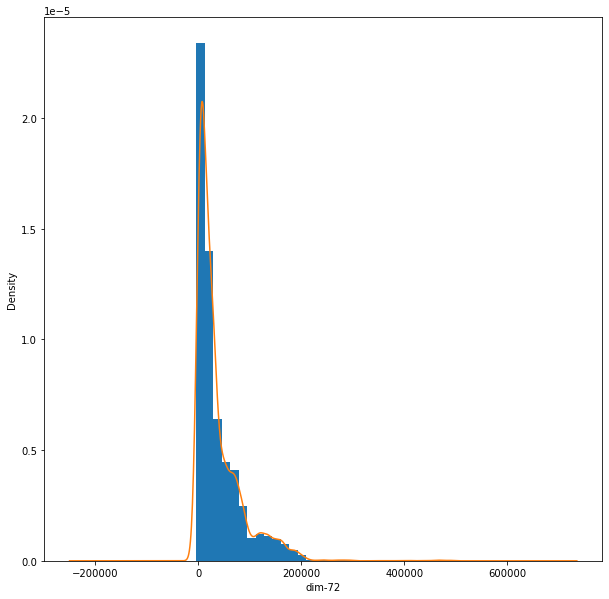

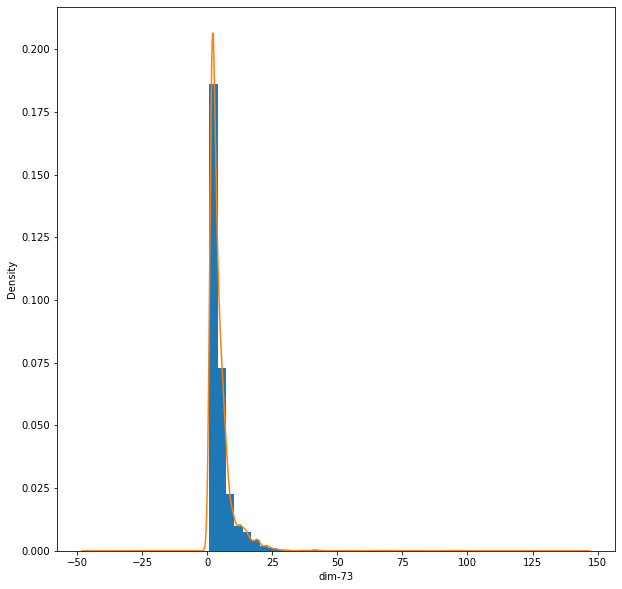

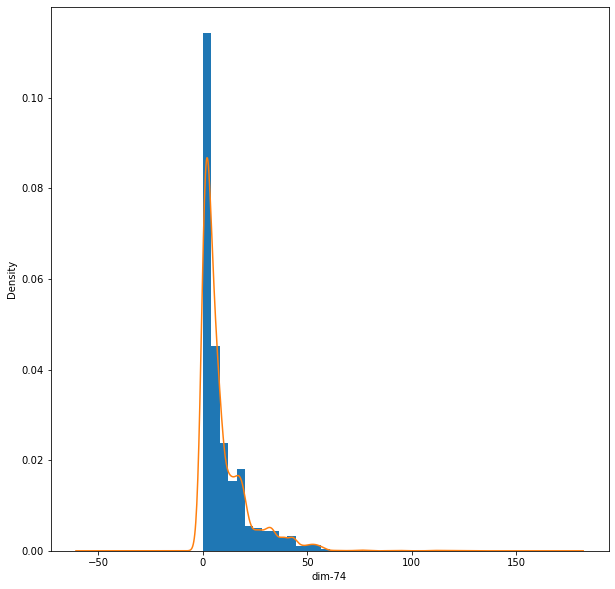

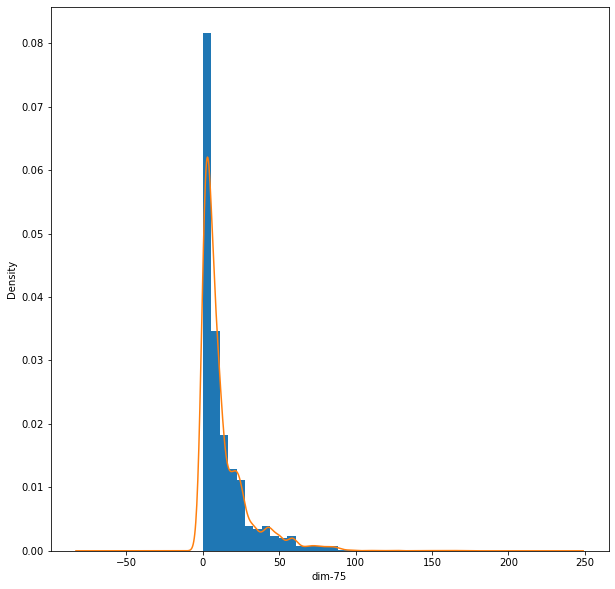

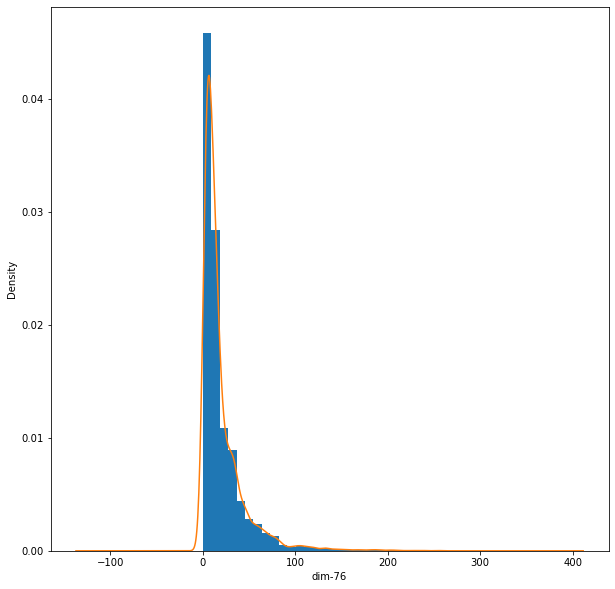

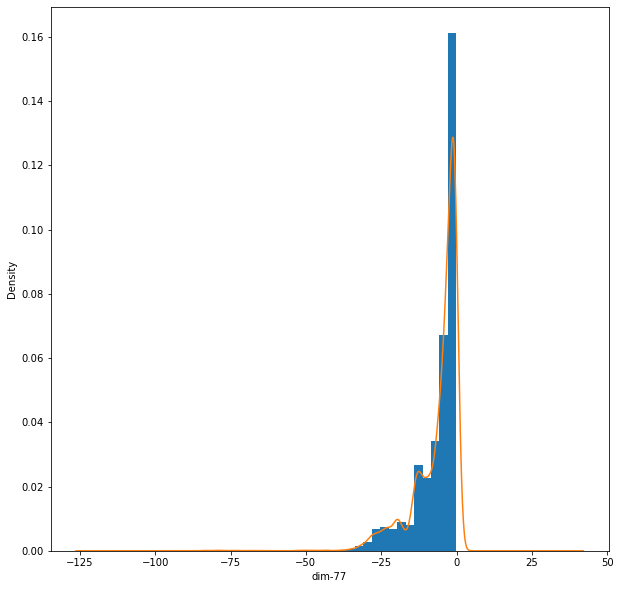

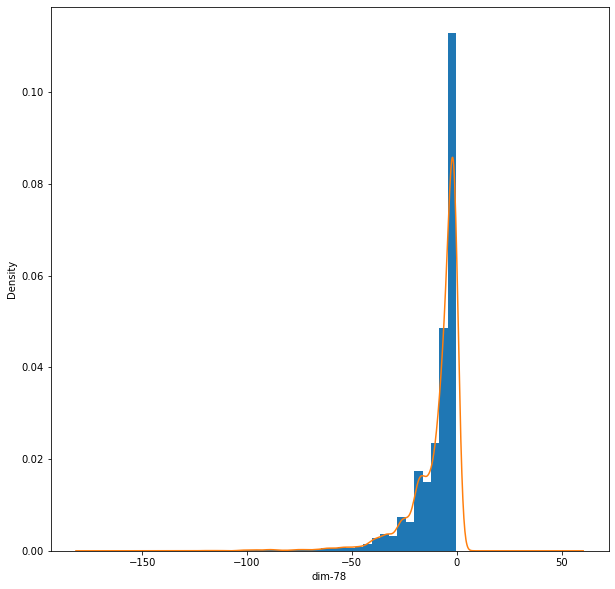

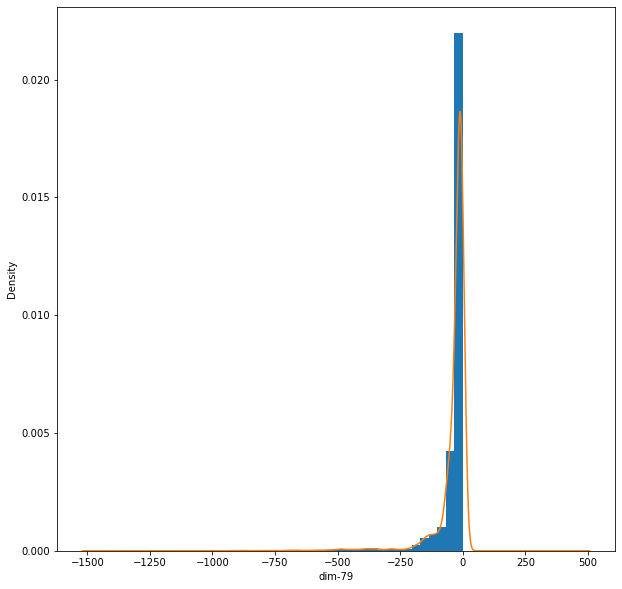

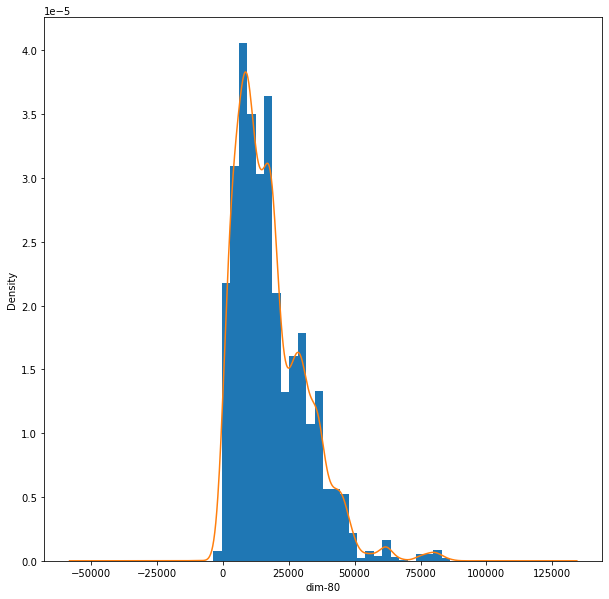

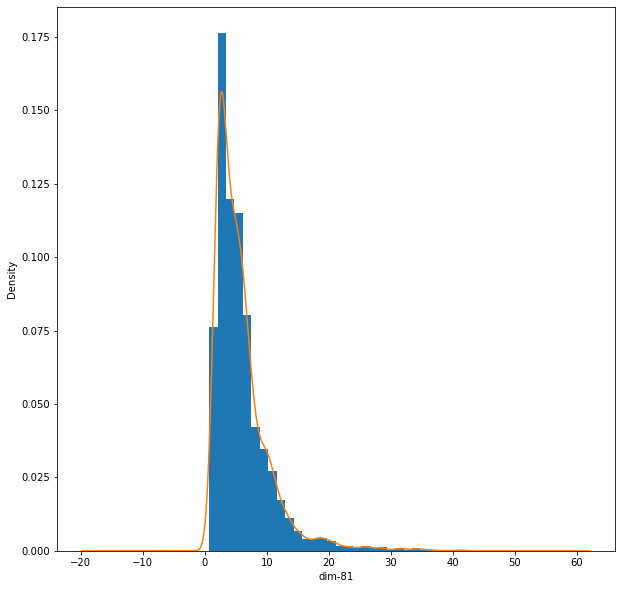

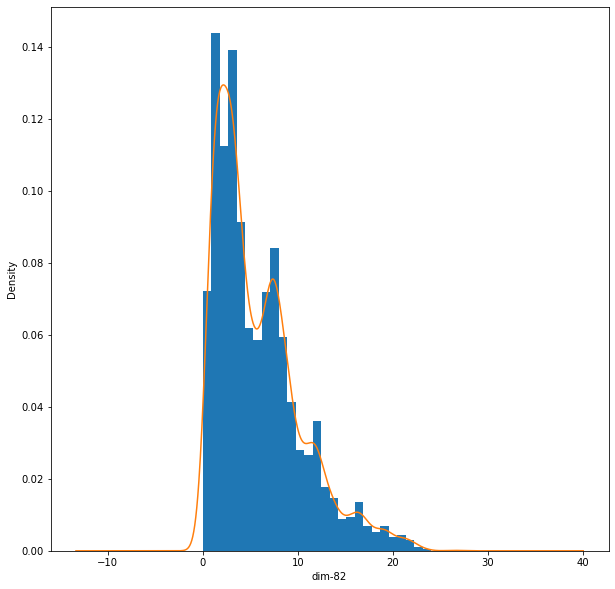

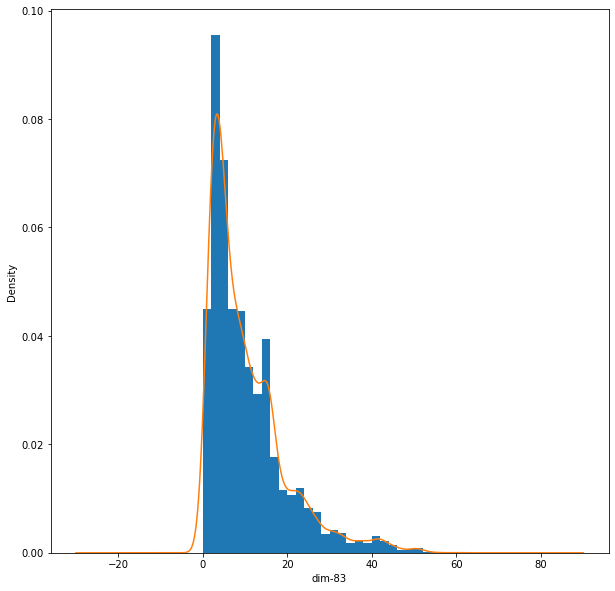

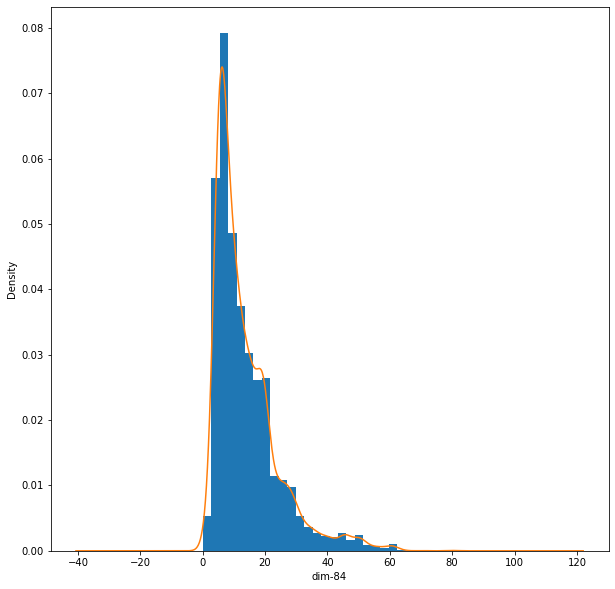

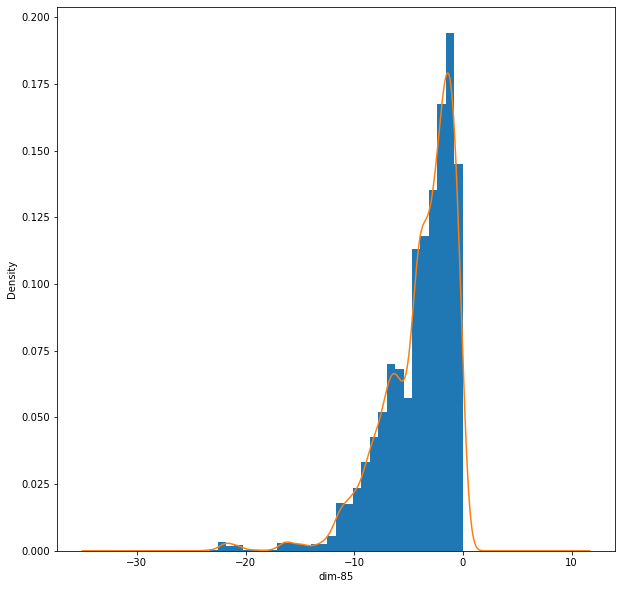

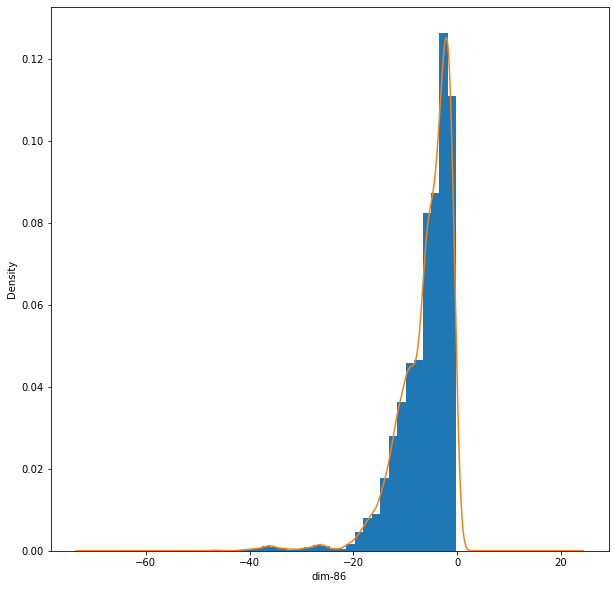

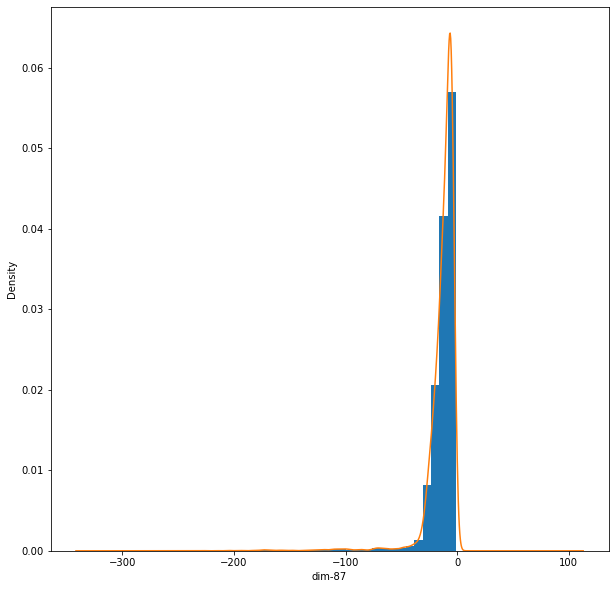

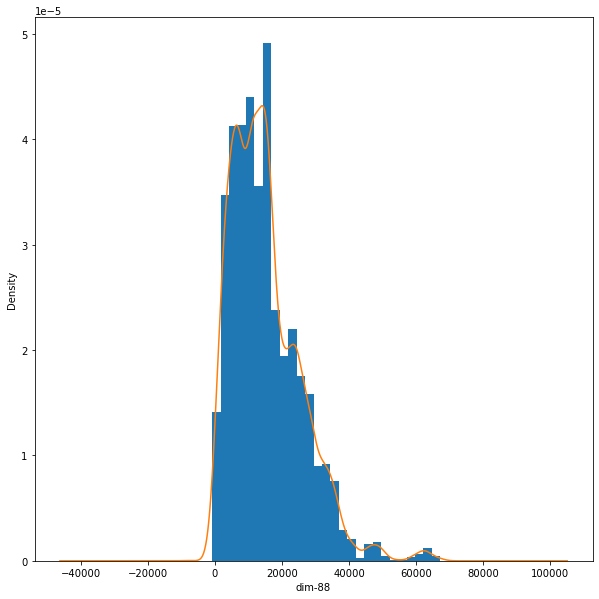

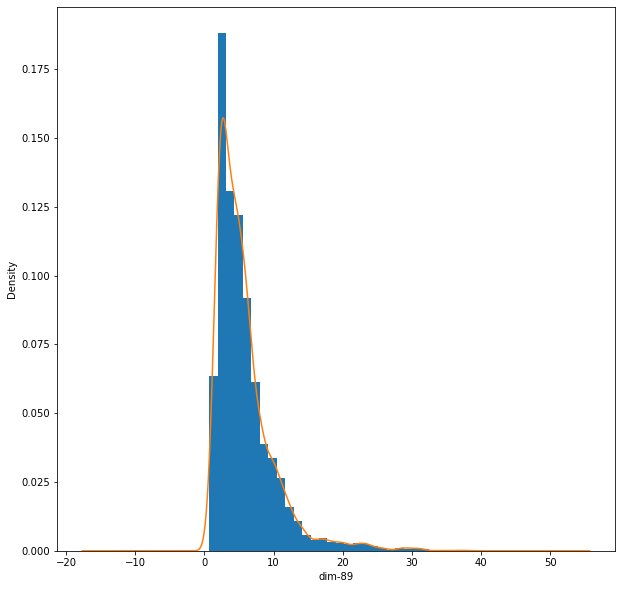

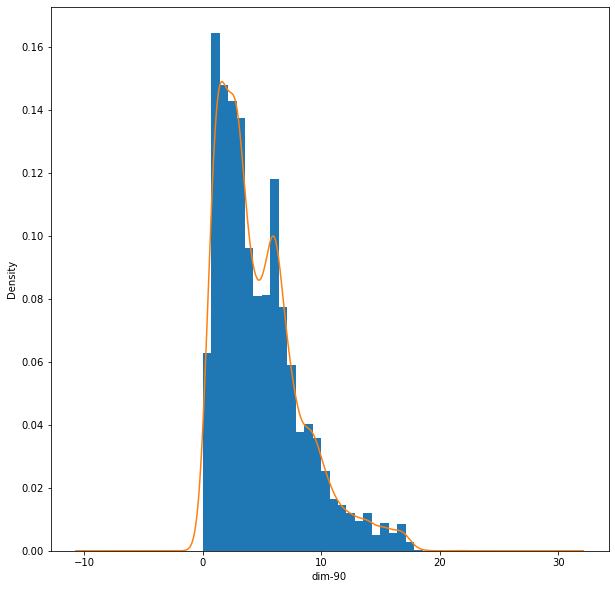

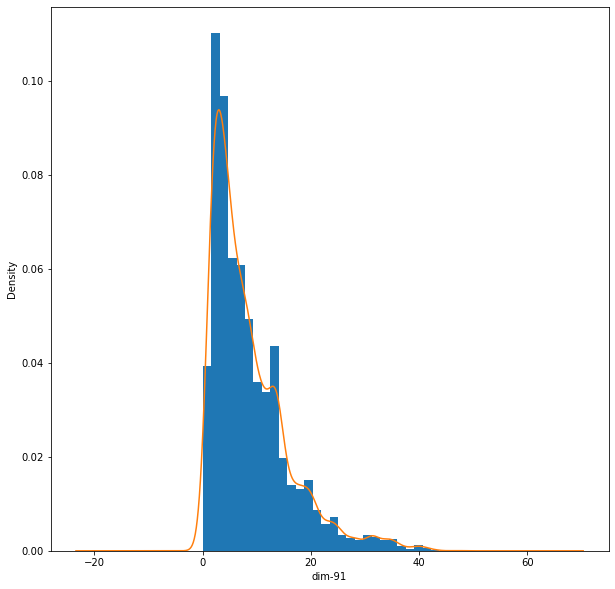

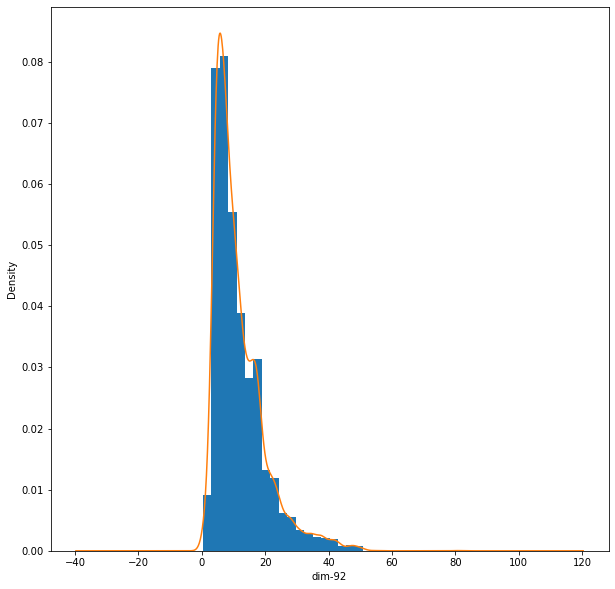

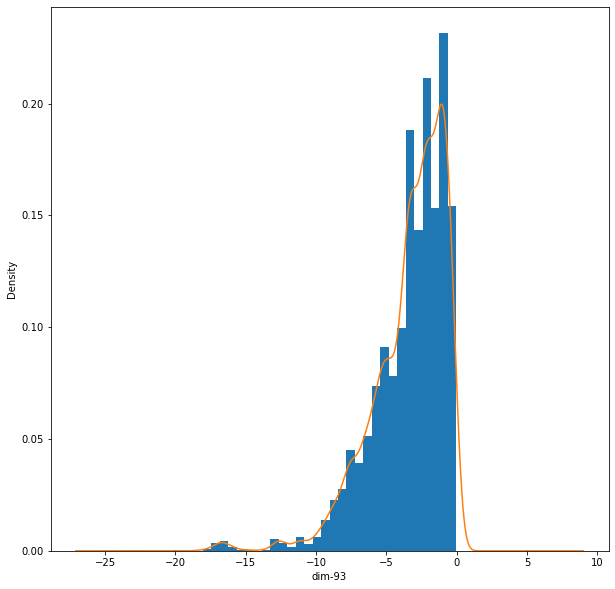

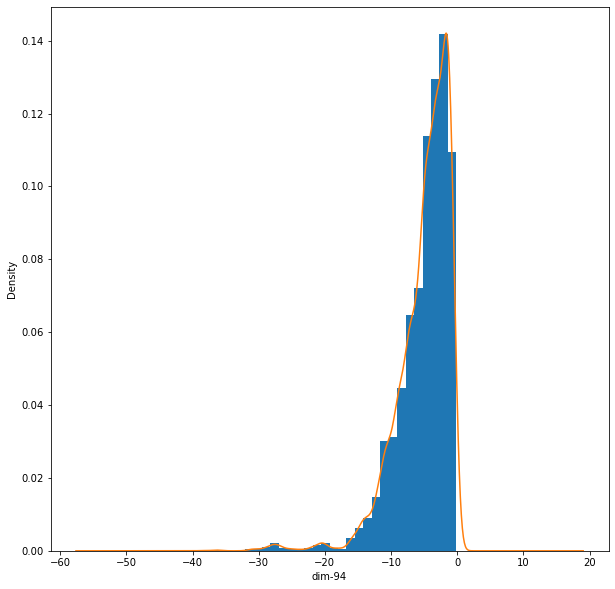

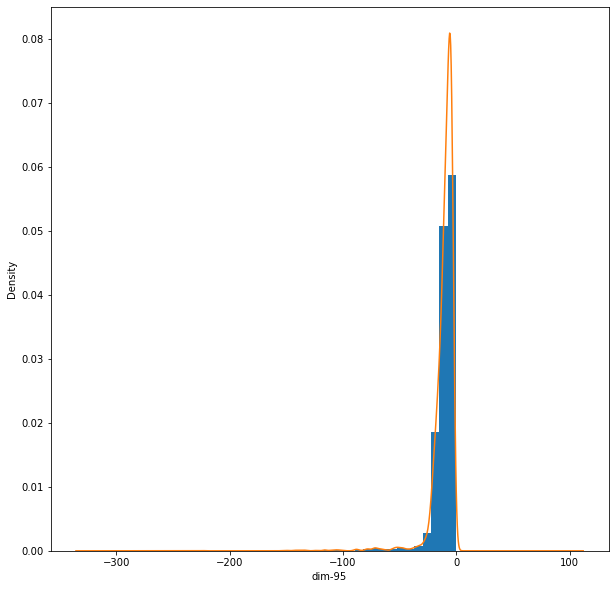

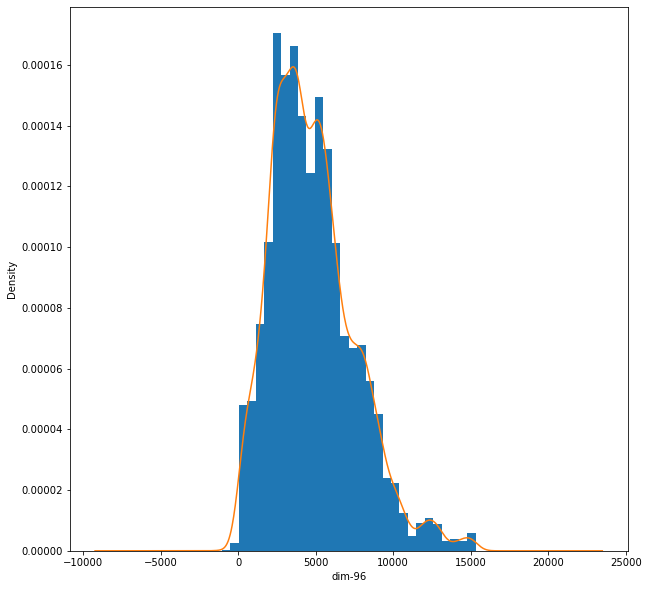

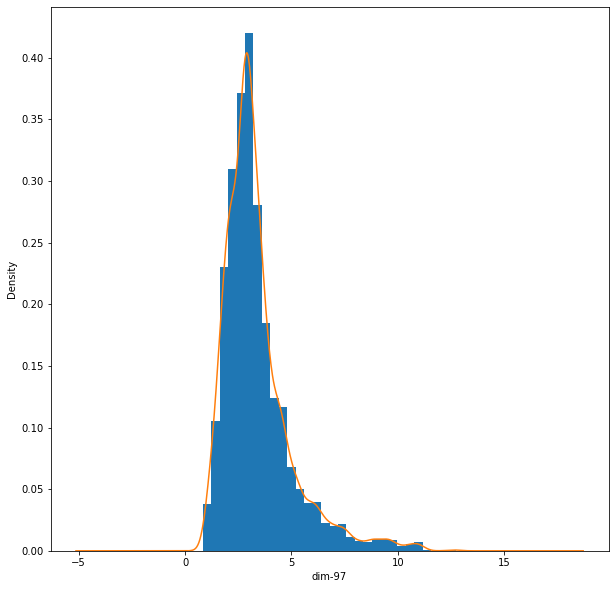

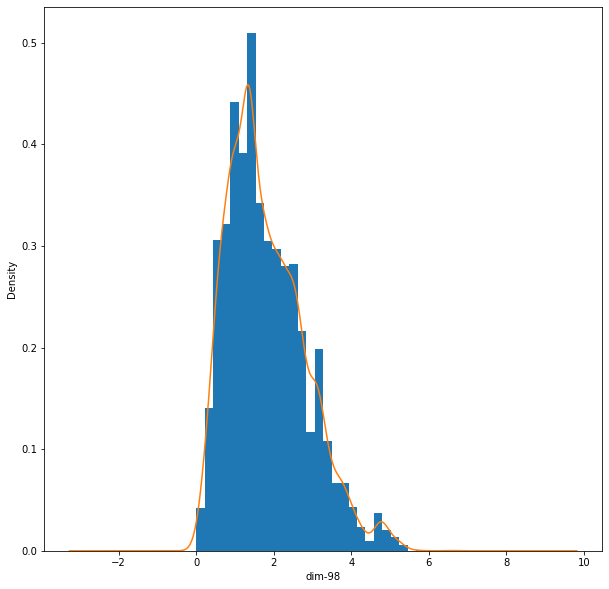

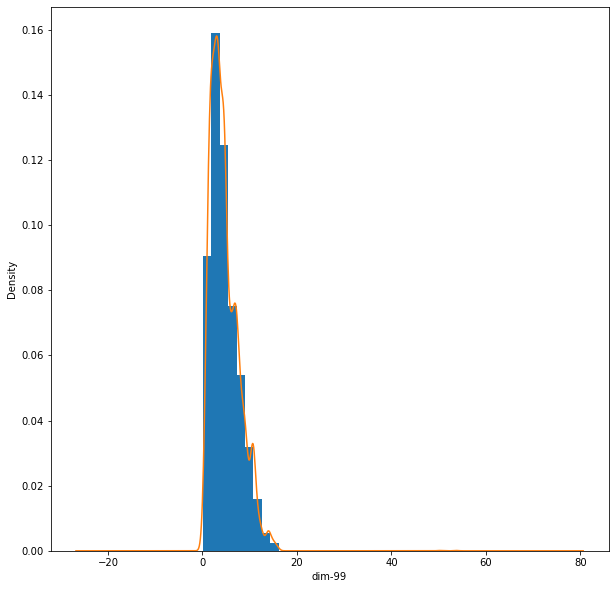

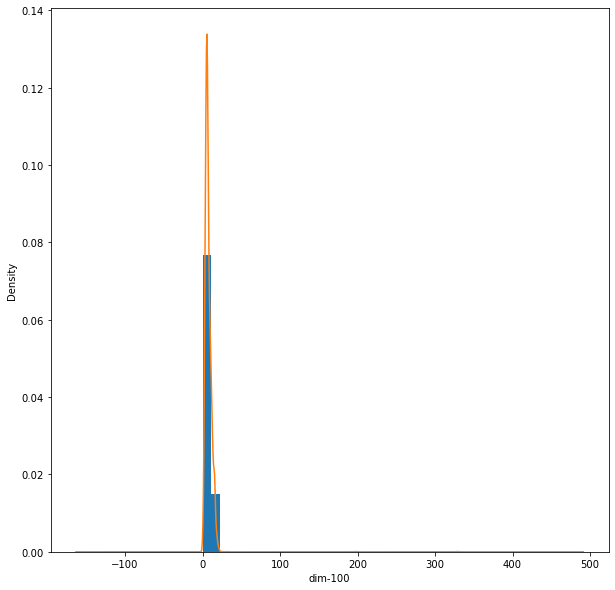

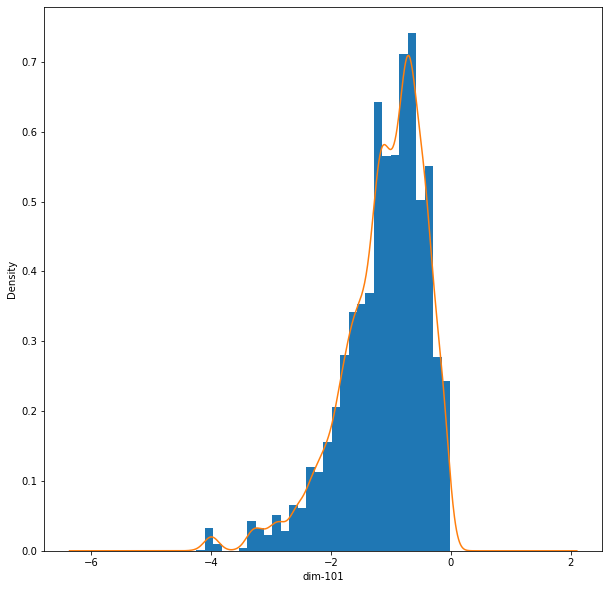

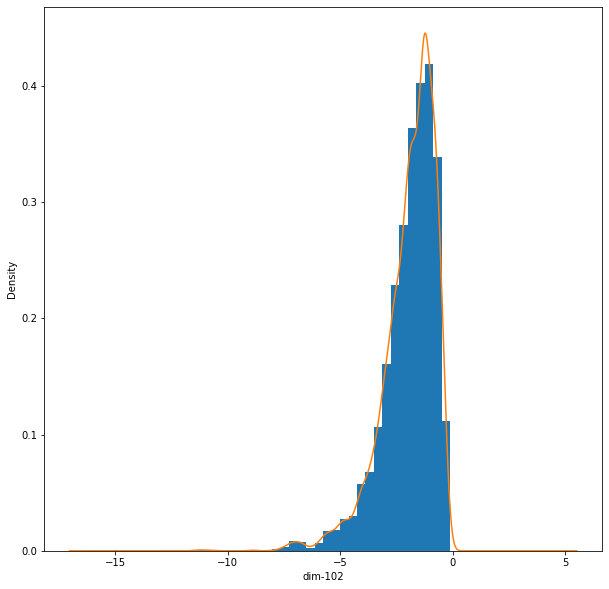

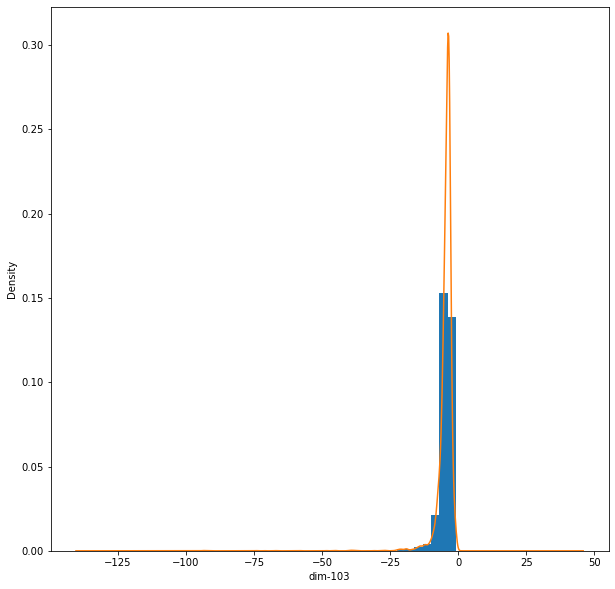

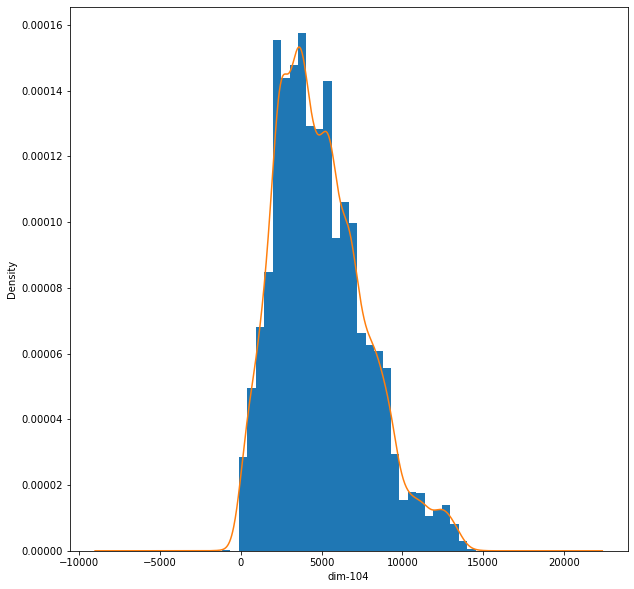

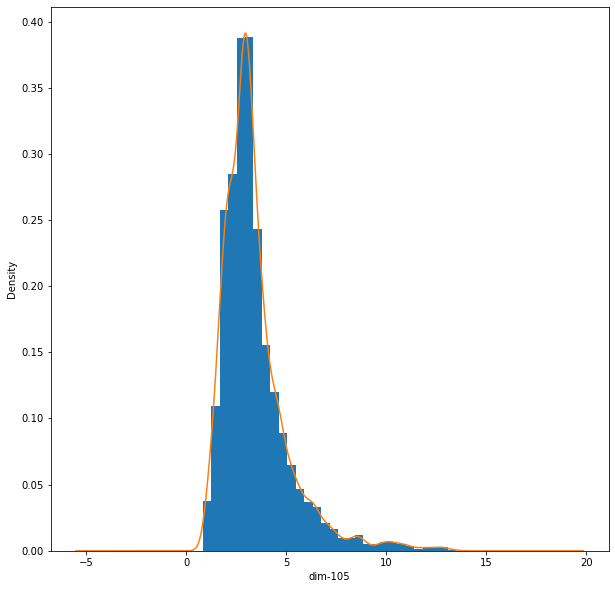

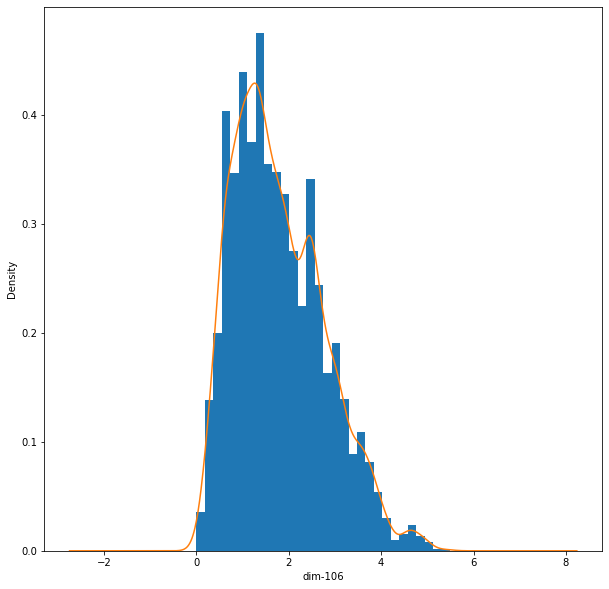

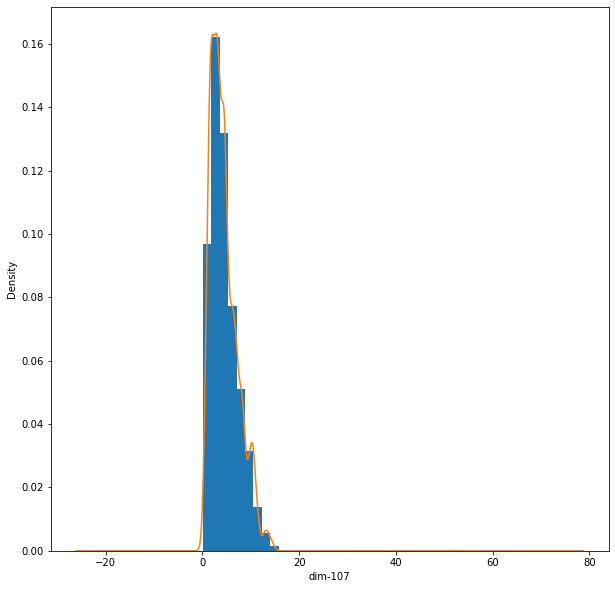

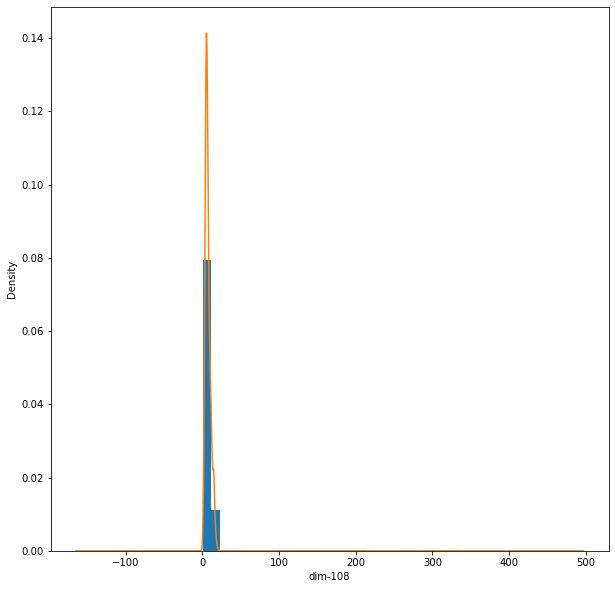

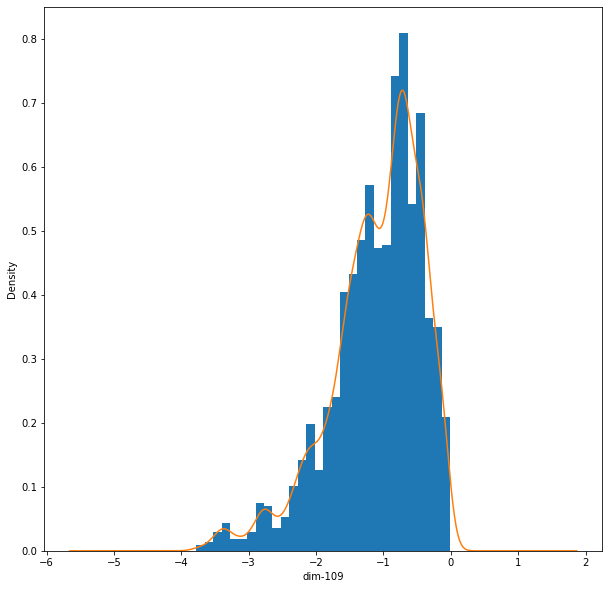

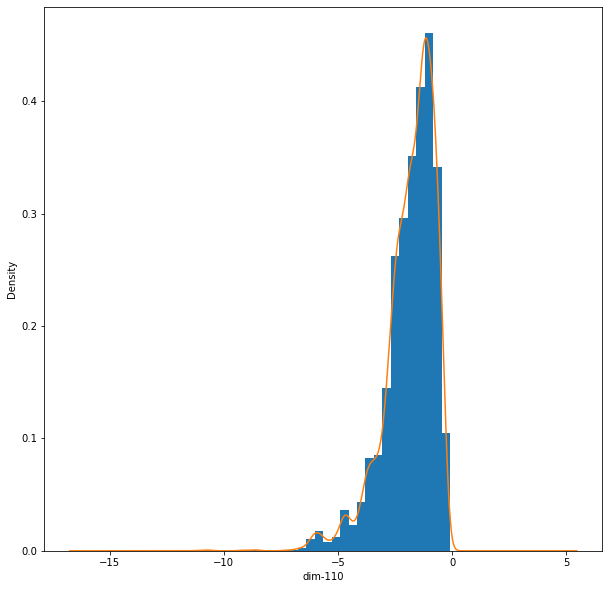

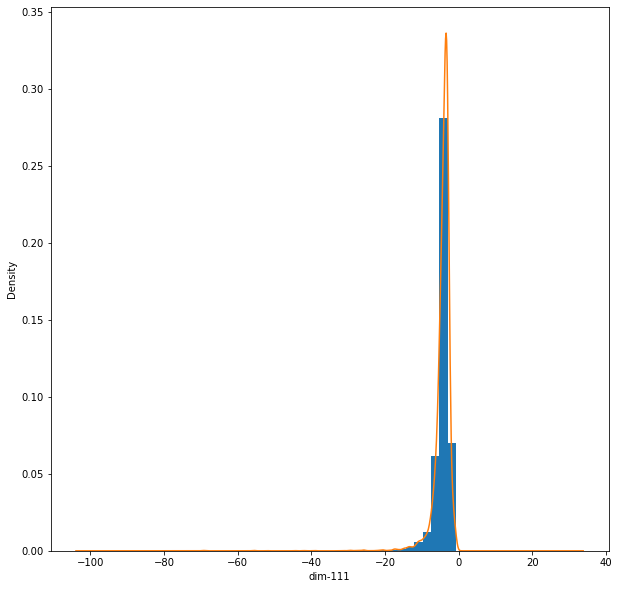

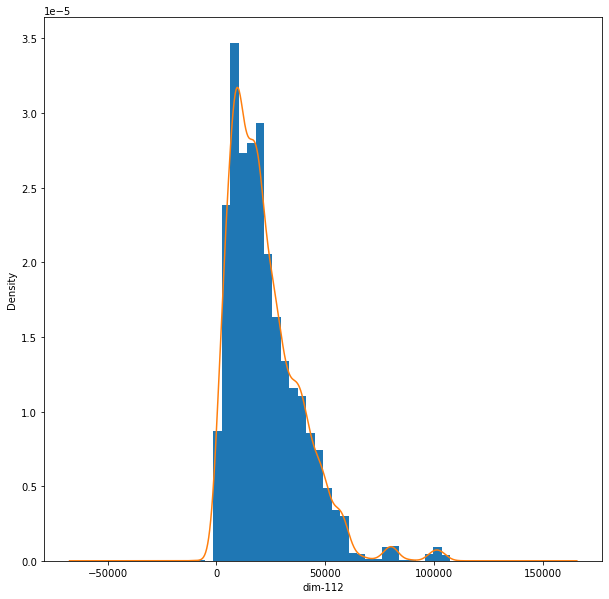

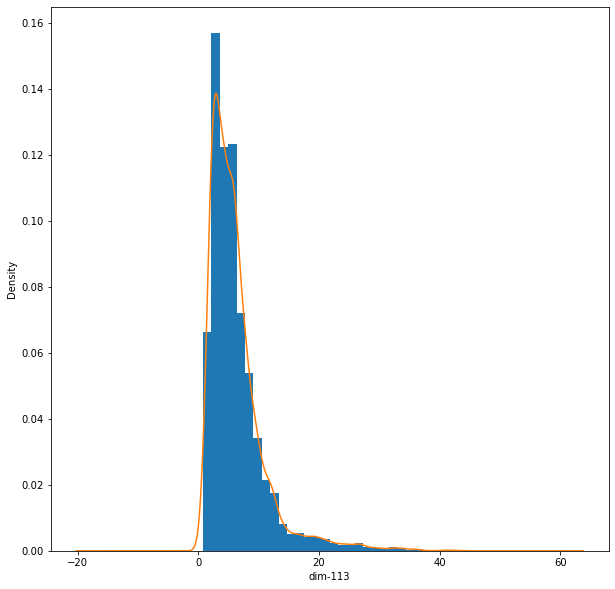

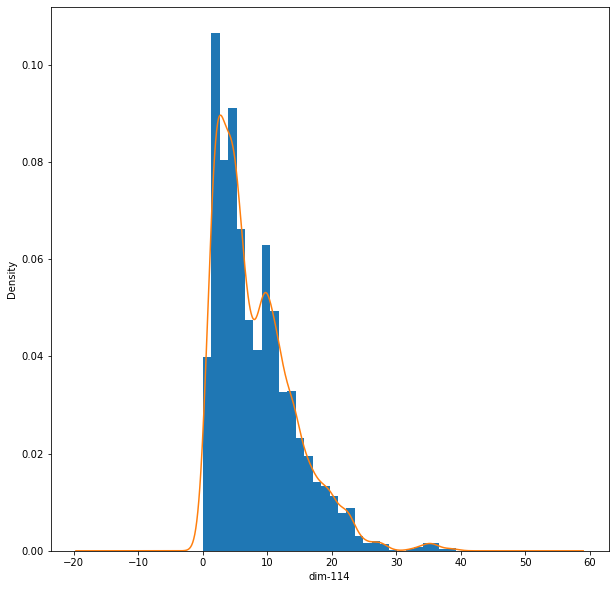

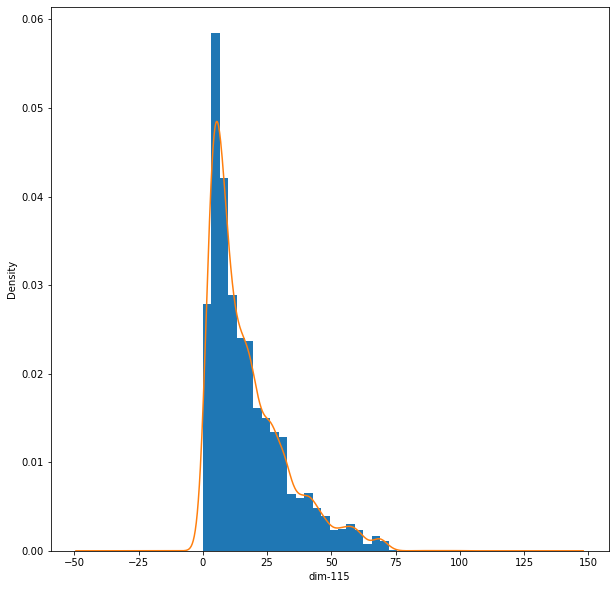

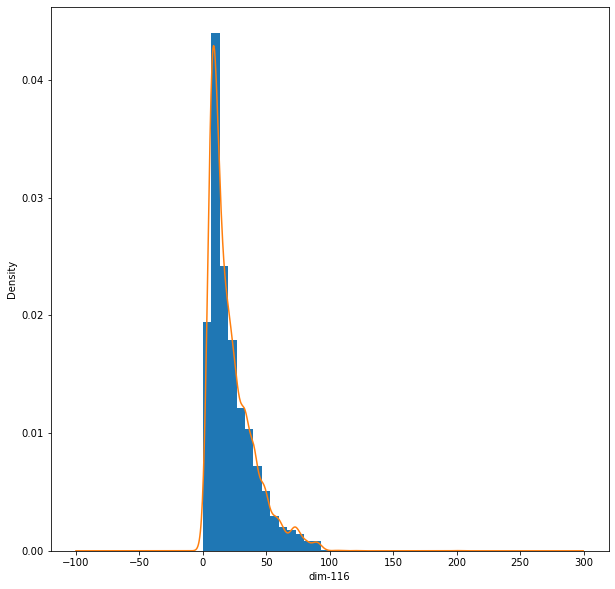

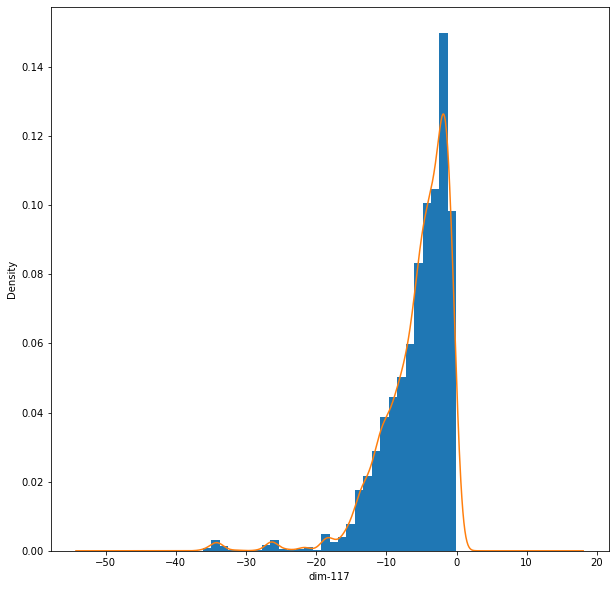

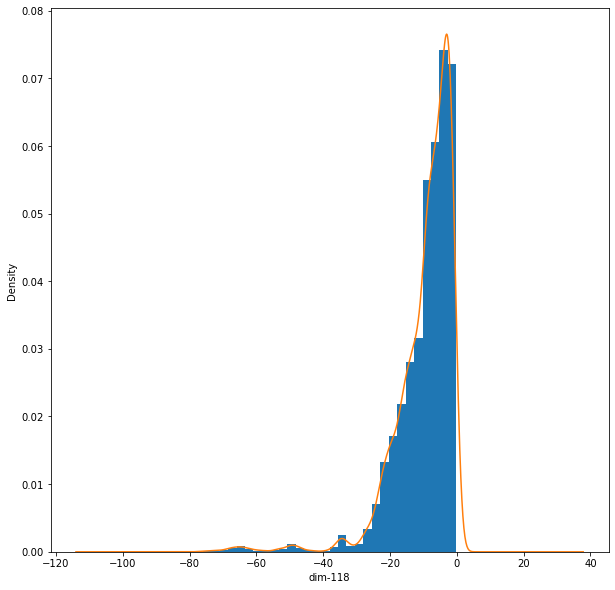

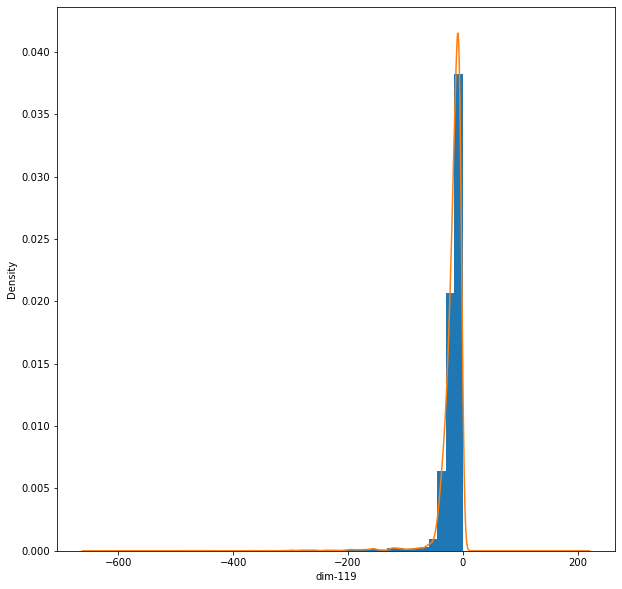

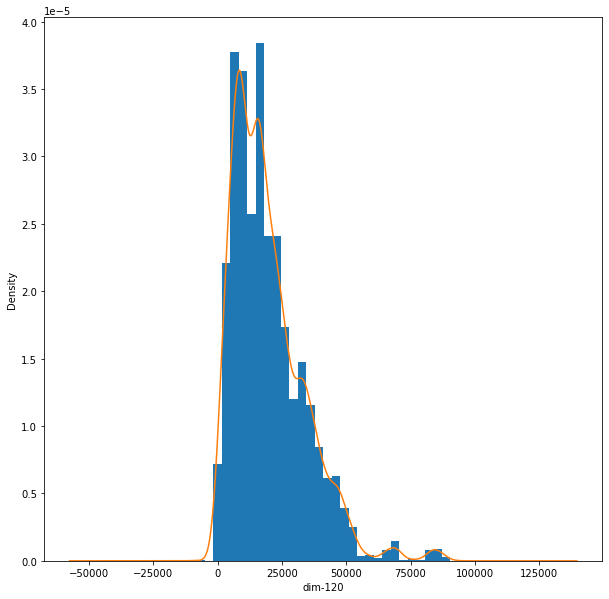

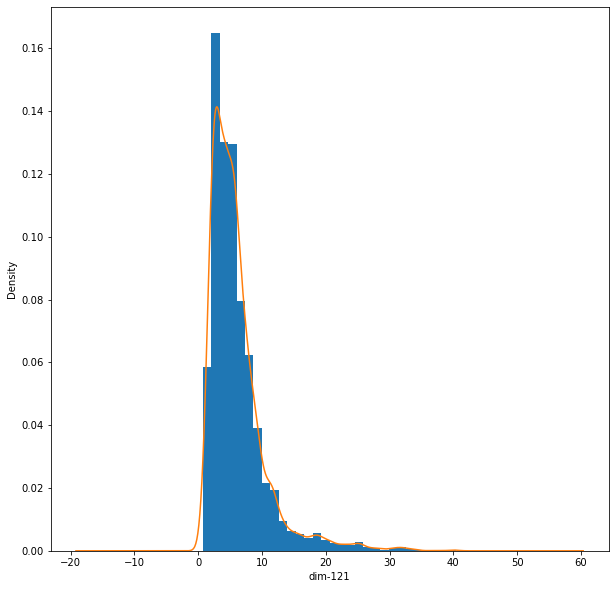

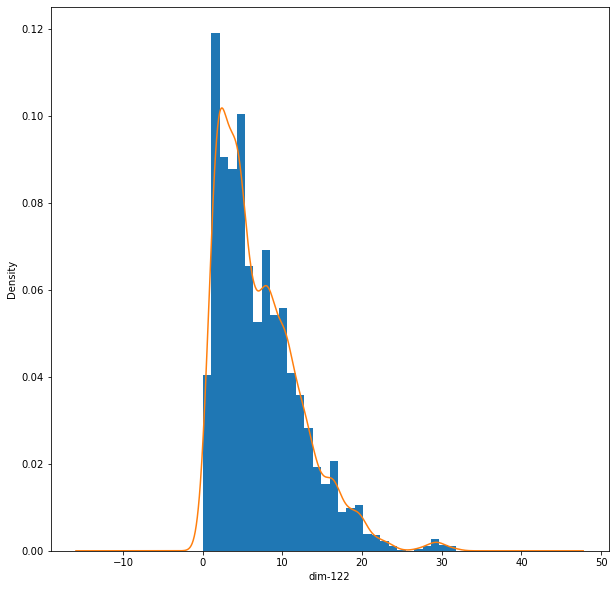

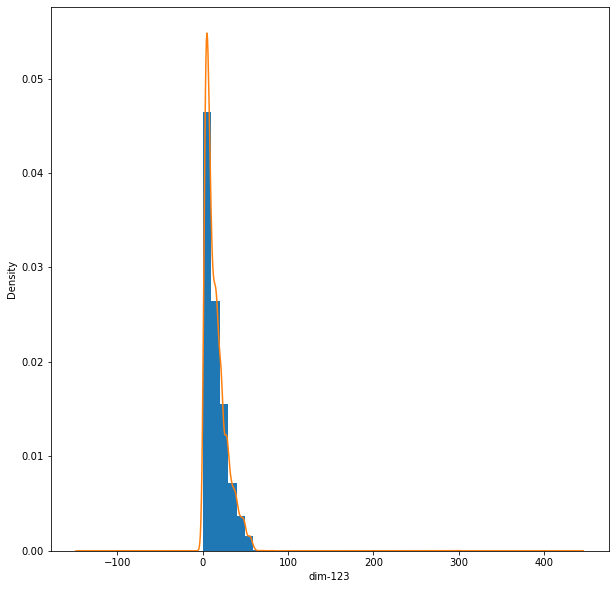

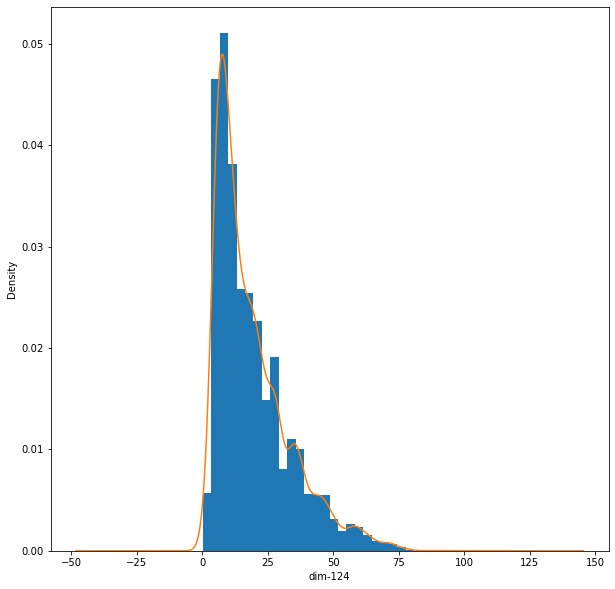

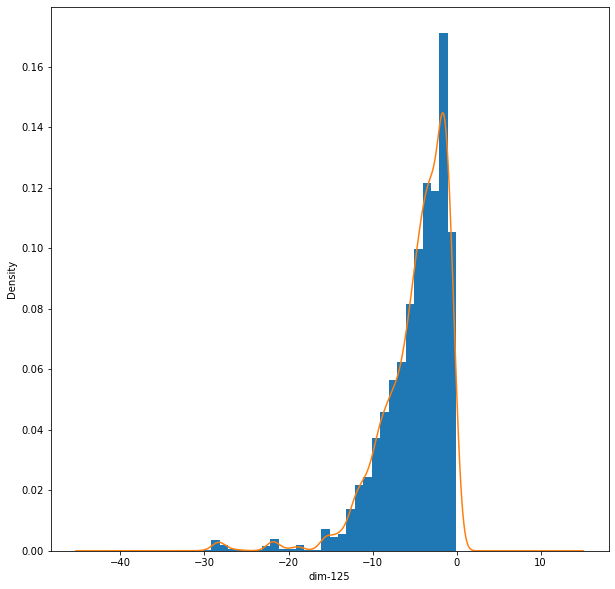

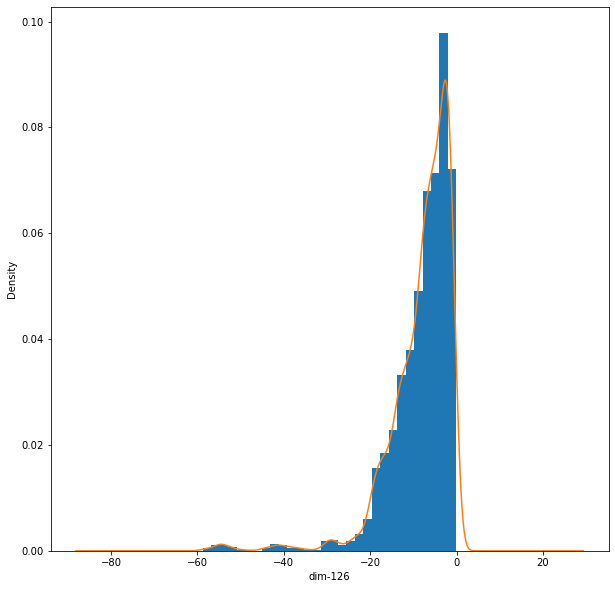

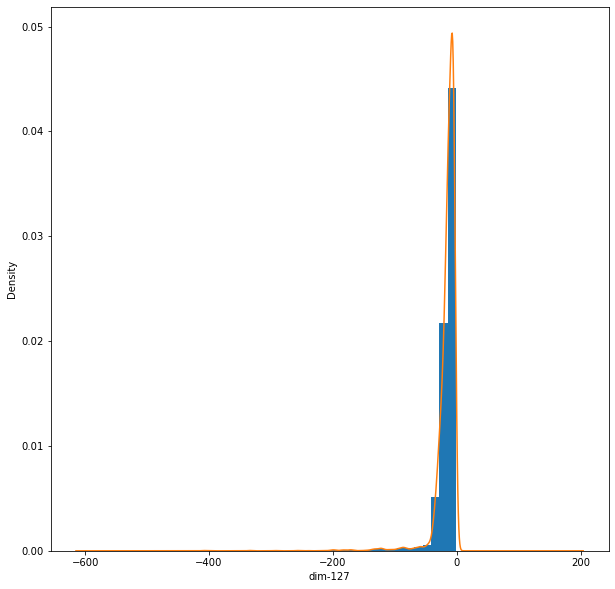

In [5]:

for i in range(128):
    plt.figure(figsize=(10,10))
    X_train_csv[i].plot(kind='hist', bins=30, density = True)
    X_train_csv[i].plot(kind='kde')
    plt.xlabel(f"dim-{i}")
    plt.savefig(f'./feature__hist/{i}__.png', dpi=300)
    plt.show()

In [6]:
X_train_csv.describe()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
count,8346.000000,8346.000000,8346.000000,8346.000000,8346.000000,8346.000000,8346.000000,8346.000000,8346.000000,8346.000000,...,8346.000000,8346.000000,8346.000000,8346.000000,8346.000000,8346.000000,8346.000000,8346.000000,8346.000000,8346.000000
mean,49902.609741,6.686965,12.823958,18.563598,26.485375,-9.074637,-14.252376,-58.334105,56761.199769,6.734881,...,-9.543014,-18.853061,19614.576609,6.038451,7.115541,14.916599,19.033853,-4.874019,-8.116945,-15.877982
std,68758.941403,16.299765,17.434447,24.649256,36.984625,12.544882,20.958158,126.214807,63146.172361,19.548788,...,9.055470,25.366938,14165.919618,4.533910,5.206196,12.536898,14.227420,4.123172,7.505155,20.198504
min,-16757.598600,0.088287,0.000100,0.000100,0.000100,-127.407470,-202.753097,-1555.550631,-16119.460900,0.486850,...,-76.069200,-442.004780,-8297.548800,0.712112,0.003238,0.025355,0.202822,-30.205911,-58.773503,-410.152297
25%,6703.926650,2.282439,1.617982,2.362283,4.937769,-11.558429,-17.169820,-48.275356,13213.210225,2.768536,...,-13.058462,-22.194101,8827.804825,3.013723,3.054586,5.419981,8.024146,-6.699913,-11.035601,-18.753124
50%,19188.954000,3.804842,4.936646,7.239355,11.638708,-3.350116,-4.964689,-13.993678,37556.756100,4.720517,...,-7.369146,-13.559079,16328.503000,4.984083,5.804854,11.328677,14.580219,-3.890385,-6.331554,-11.736492
75%,62472.877800,8.438259,17.145460,26.085503,34.549582,-1.121579,-1.675425,-5.205338,69941.130150,8.631187,...,-3.277017,-7.385239,26739.542550,7.373897,10.205102,21.233618,26.503304,-1.810972,-2.893410,-6.471679
max,668677.085900,1339.879283,164.257913,221.558494,664.208067,-0.021669,-0.109067,-0.475184,502202.812500,1672.363221,...,-0.136892,-0.372947,90328.637700,40.470570,31.835214,297.225880,97.042997,-0.016275,-0.062814,-0.528959


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_csv = scaler.fit_transform(X_train_csv.values)
X_train_csv= pd.DataFrame(X_train_csv)

In [8]:
import numpy as np
from sklearn.manifold import TSNE
import time

X = np.array(X_train_csv)

X_embedded = TSNE(n_components=3).fit_transform(X)
print(X_embedded.shape)
X_embedded = pd.DataFrame(X_embedded)
X_embedded 



from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=2)

X_embedded = pca.fit_transform(X_train_csv.values)

X_embedded = pd.DataFrame(X_embedded)
X_embedded

(8346, 3)


,0,1
0,9.219075,8.911389
1,-8.532530,0.059316
2,1.912916,-1.103222
3,5.005526,5.545237
4,7.448658,10.097208
...,...,...
8341,2.132972,3.150477
8342,-3.615722,2.060610
8343,17.497660,1.338024
8344,-8.135089,-0.949130


In [9]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data1 = X_embedded[y_train_label_csv[0]==1]
data2 = X_embedded[y_train_label_csv[0]==2]
data3 = X_embedded[y_train_label_csv[0]==3]
data4 = X_embedded[y_train_label_csv[0]==4]
data5 = X_embedded[y_train_label_csv[0]==5]
data6 = X_embedded[y_train_label_csv[0]==6]

In [55]:
# plt.figure(figsize=(15,10))

# ax = plt.axes(projection='3d')
# ax.scatter(data1[0], data1[1], data1[2],c='lightgreen',marker='o',label="class1")
# ax.scatter(data2[0], data2[1],data2[2],c='orange',marker='o', label="class2")
# ax.scatter(data3[0], data3[1], data3[2],c='lightblue',marker='o', label="class3")
# ax.scatter(data4[0], data4[1],data4[2],c='red',marker='o', label="class4")
# ax.scatter(data5[0], data5[1],data5[2],c='blue',marker='o', label="class5")
# ax.scatter(data6[0], data6[1],data6[2],c='Black',marker='o', label="class6")


# plt.show()

# plt.scatter(data1[0], data1[1],c='lightgreen',marker='o',label="class1")
# plt.scatter(data2[0], data2[1],c='orange',marker='o', label="class2")
# plt.scatter(data3[0], data3[1],c='lightblue',marker='o', label="class3")
# plt.scatter(data4[0], data4[1],c='red',marker='o', label="class4")
# plt.scatter(data5[0], data5[1],c='blue',marker='o', label="class5")
# plt.scatter(data6[0], data6[1],c='Black',marker='o', label="class6")

# plt.legend()
# plt.show()

/opt/anaconda3/envs/COMP9444/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 67.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/COMP9444/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 89.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/COMP9444/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 90.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/COMP9444/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 71.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/COMP9444/lib/python3.7/site-

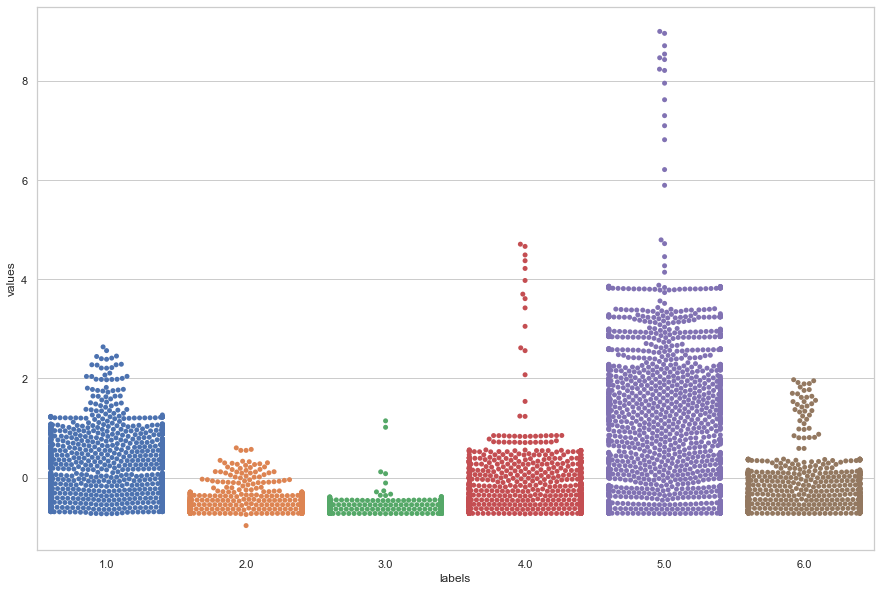

In [11]:
data_cut = pd.DataFrame()
data_cut["values"]=X_train_csv[0]
data_cut["labels"]= y_train_label_csv
sns.set(style="whitegrid")

plt.figure(figsize=(15, 10))
# # sns.catplot(x="labels", y="values", data=data_cut, jitter=0.2)
# # sns.stripplot(x="labels", y="values", data=data_cut, jitter=True )
# # sns.violinplot(x="labels", y="values", data=data_cut, inner=None)

sns.swarmplot(x="labels", y="values", data=data_cut)

plt.show()


<AxesSubplot:title={'center':'feature1'}, ylabel='values'>

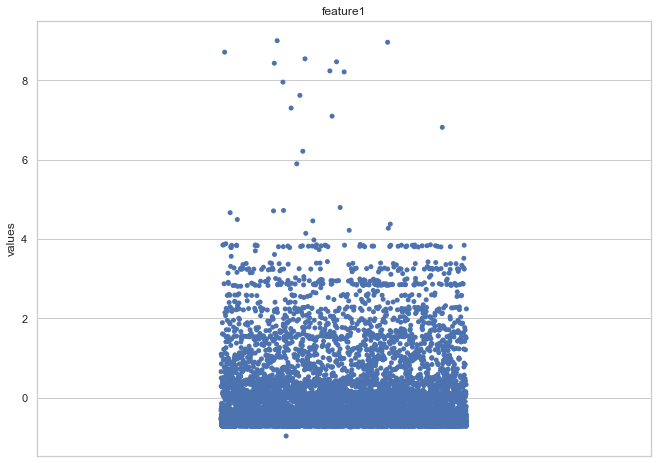

In [12]:
plt.figure(figsize=(11, 8))
plt.title("feature1")
sns.stripplot(y=data_cut["values"],jitter=0.2)



<AxesSubplot:title={'center':'original'}, xlabel='labels', ylabel='values'>

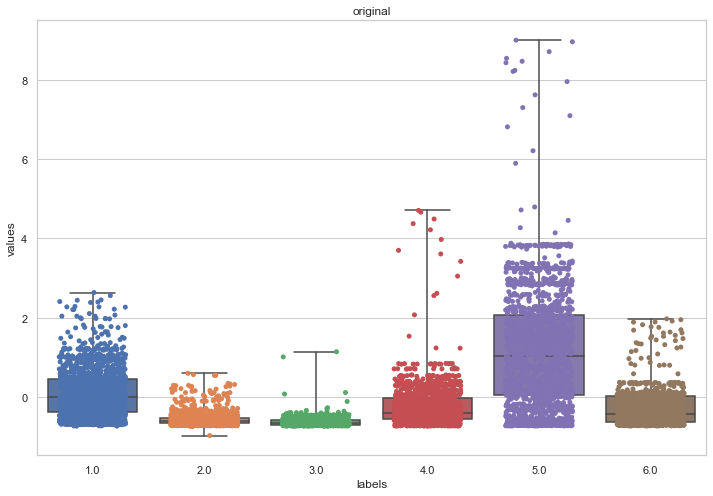

In [13]:
plt.figure(figsize=(12, 8))
# sns.violinplot(x="labels", y="values", data=data_cut, inner=None)
plt.title("original")
sns.boxplot(x="labels", y="values", data=data_cut, whis=np.inf)
sns.stripplot(x="labels", y="values", data=data_cut,jitter=0.3)


<AxesSubplot:xlabel='labels', ylabel='values'>

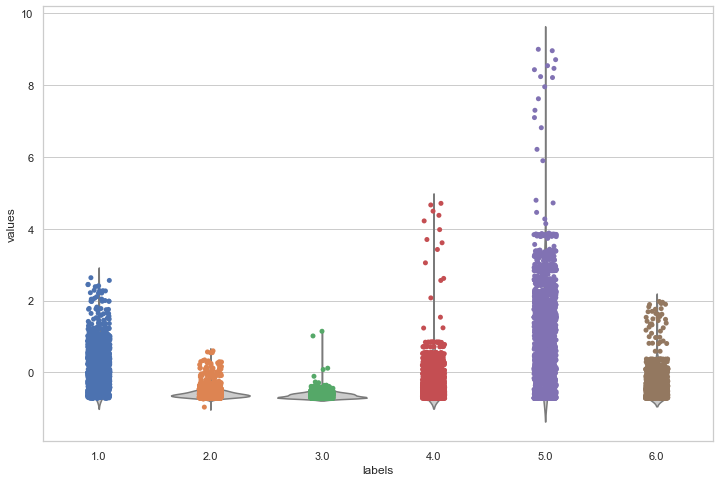

In [14]:
plt.figure(figsize=(12, 8))
sns.violinplot(x="labels", y="values", data=data_cut, inner=None, color=".8")

# sns.boxplot(x="labels", y="values", data=data_cut, whis=np.inf)
sns.stripplot(x="labels", y="values", data=data_cut,jitter=True)


In [15]:
kmeans_del = [282, 783, 994, 1952, 2443, 2519, 2546, 2746, 2786, 2916, 3141, 3411, 3530, 5190, 5219, 5358, 5735, 5873, 6598, 6719, 7209, 7368, 7498, 7550, 8150, 8246] +\
           [409, 606, 1042, 6541, 7801, 7814] +\
           [364, 856, 1840, 3531, 5038, 5595, 5704, 6428, 6489, 6872] +\
           [14, 308, 1332, 1911, 3958, 5062, 5526, 5851, 6843, 6861, 7699, 7809, 8337] +\
           [38, 1172, 2584, 2959, 3112, 4029, 4190, 4443, 5105, 5131, 6018, 6619, 6659, 7238, 7794] +\
           [36, 123, 177, 281, 433, 495, 1269, 1317, 1398, 2237, 2341, 2455, 2782, 2935, 3303, 3611, 3702, 5114, 5365, 5419, 5464, 5882, 6158, 6645, 6992, 7214, 7482, 7646, 7738, 8078, 8154]

In [17]:
X_kmeans_cut_train = X_train_csv.drop(X_train_csv.index[kmeans_del]).reset_index(drop=True)
y_kmeans_cut_train = y_train_label_csv.drop(y_train_label_csv.index[kmeans_del]).reset_index(drop=True)

<AxesSubplot:xlabel='labels', ylabel='values'>

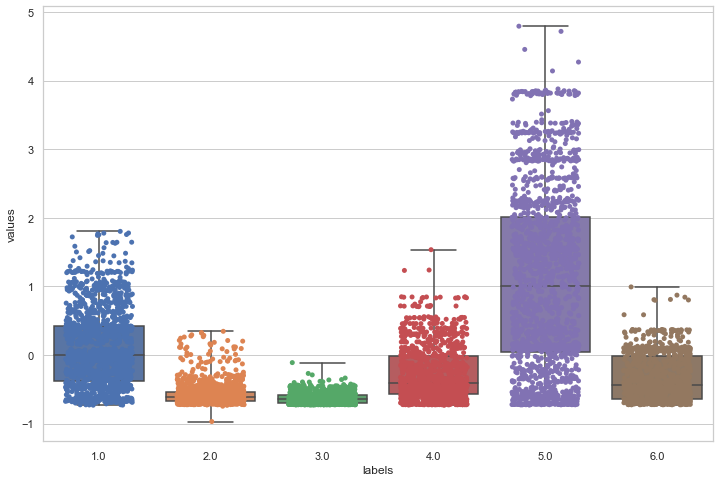

In [18]:
kmeans_cut = pd.DataFrame()
kmeans_cut['values'] = X_kmeans_cut_train[0]
kmeans_cut['labels'] = y_kmeans_cut_train


plt.figure(figsize=(12, 8))
# sns.violinplot(x="labels", y="values", data=data_cut, inner=None)


sns.boxplot(x="labels", y="values", data=kmeans_cut, whis=np.inf)
sns.stripplot(x="labels", y="values", data=kmeans_cut,jitter=0.3)

<AxesSubplot:title={'center':'feature1'}, xlabel='values'>

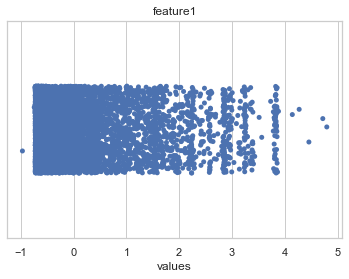

In [19]:
plt.title("feature1")
sns.stripplot(x=kmeans_cut["values"],jitter=0.2 )


In [20]:
#计算两个向量之间的欧式距离
def distance(vec1,vec2) :
    return np.sqrt(sum(np.power(vec1-vec2,2)))


In [21]:
# mappedX = tsne(X, labels, no_dims, init_dims, perplexity)

# gscatter(mappedX(:,1), mappedX(:,2), train_labels)